# Install packages

- pyreadstat is required to read .SAV file

In [544]:
pip install pyreadstat

Note: you may need to restart the kernel to use updated packages.


In [545]:
pip install fancyimpute

Note: you may need to restart the kernel to use updated packages.


In [546]:
pip install boruta

Note: you may need to restart the kernel to use updated packages.


# Import packages

- pandas is a fundamental and powerful package for data analysis and manipulation.
- pyreadstat for reading .sav file
- numpy is the fundamental package for scientific computing with Python.
- matplotlib is a library to plot graphs in Python.
- seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

In [547]:
import pandas as pd
import pyreadstat
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
import plotly.express as px
from sklearn.model_selection import KFold, ShuffleSplit, StratifiedKFold, StratifiedShuffleSplit, LeaveOneOut, train_test_split # for separating train and test data, scaling, model building, ...



from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTEENN

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_val_score



#Setting seed for keeping all the random function calls consistent.
np.random.seed(40)  

#allow tab function
%config Completer.use_jedi = False

# 1. Read SECOM dataset

In [548]:
raw_data = pd.read_spss("../data/secom_mod.sav")
raw_data = raw_data.set_index('ID')
#raw_data['class'] = raw_data['class'].replace({0: "Pass", 1: "Fail"})

# 2. Data Understanding

#### 2.1 Exploring data (Data Quality and Data Quantity)

In [549]:
## have a look at the first five rows of dataset
raw_data.head()

,class,timestamp,feature001,feature002,feature003,feature004,feature005,feature006,feature007,feature008,...,feature581,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590
ID,,,,,,,,,,,,,,,,,,,,,
1.0,0.0,19/07/2008 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
2.0,0.0,19/07/2008 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
3.0,1.0,19/07/2008 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
4.0,0.0,19/07/2008 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
5.0,0.0,19/07/2008 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


In [550]:
## Overview information about SECOM dataset
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1567 entries, 1.0 to 1567.0
Columns: 592 entries, class to feature590
dtypes: float64(591), object(1)
memory usage: 7.1+ MB


In [551]:
## Shape of data set including 1567 rows and 593 columns
raw_data.shape

(1567, 592)

In [552]:
## Example of Statistical numeric values in 8 rows
raw_data.describe()

,class,feature001,feature002,feature003,feature004,feature005,feature006,feature007,feature008,feature009,...,feature581,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590
count,1567.000000,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,...,618.000000,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000
mean,0.060625,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,...,0.005396,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066
std,0.238718,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,...,0.003116,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919
min,0.000000,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,...,0.001000,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000
25%,0.000000,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,...,0.003400,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600
50%,0.000000,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,...,0.004700,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500
75%,0.000000,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,...,0.006475,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700
max,1.000000,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,...,0.028600,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800


In [553]:
#Check duplicated observation
raw_data.duplicated(subset=None, keep='first').sum()

0

In [554]:
# Types of data in the dataset
raw_data.dtypes

class         float64
timestamp      object
feature001    float64
feature002    float64
feature003    float64
               ...   
feature586    float64
feature587    float64
feature588    float64
feature589    float64
feature590    float64
Length: 592, dtype: object

In [555]:
# Number of pass and fail values
raw_data['class'].value_counts()

0.0    1472
1.0      95
Name: class, dtype: int64

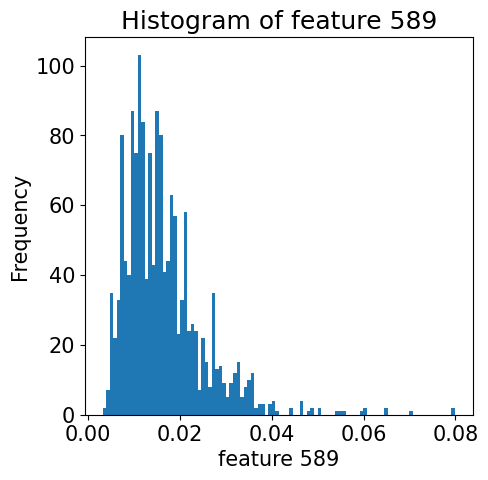

In [556]:
#Example of histogram of feature 589
plt.hist(raw_data.iloc[:,589], bins = 100)
plt.xlabel('feature 589')
plt.ylabel('Frequency')
plt.title('Histogram of feature 589')
plt.show()

#### 2.2 Missing Value Analysis

In [557]:
#Drop other features (class, timestamp)
feature_data = raw_data.drop(['class', 'timestamp'], axis=1)

In [558]:
# Checking NA in feature 160
raw_data['feature160'].isna().sum()

2

In [559]:
# Total number of NA values in the dataset
raw_data.isna().sum().sum()

41951

In [560]:
# Showing top 10 features containing missing values
feature_na = feature_data.isnull().sum().sort_values(ascending = False).head(10)

print(feature_na)

feature158    1429
feature293    1429
feature294    1429
feature159    1429
feature493    1341
feature359    1341
feature086    1341
feature221    1341
feature247    1018
feature110    1018
dtype: int64


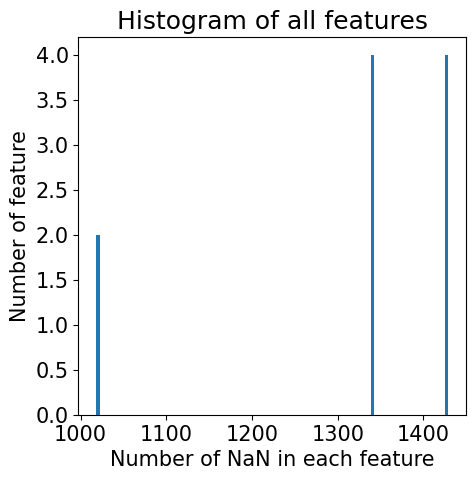

In [561]:
# Plot top 10 features containing missing values
plt.hist(feature_na, bins= 100)
plt.xlabel('Number of NaN in each feature')
plt.ylabel('Number of feature')
plt.title('Histogram of all features')
plt.show()

In [562]:
#Show number of missing values of 100 features in ascending order
feature_na = feature_data.isnull().sum().sort_values(ascending = True).head(100)

In [563]:
feature_na[feature_na <= 100]

feature292    0
feature249    0
feature250    0
feature251    0
feature252    0
             ..
feature045    1
feature456    1
feature457    1
feature458    1
feature459    1
Length: 100, dtype: int64

In [564]:
#Check is there any missing values in all features 
feature_data.isnull().any().any()

True

In [565]:
#Check missing values in each row 
raw_data.isnull().sum(axis = 1).sort_values(ascending = True).head(10)

ID
853.0     4
1257.0    4
774.0     4
818.0     4
1209.0    4
844.0     4
1247.0    4
1456.0    4
953.0     4
1181.0    8
dtype: int64

In [566]:
raw_data.isnull().sum(axis = 0) # each column

class          0
timestamp      0
feature001     6
feature002     7
feature003    14
              ..
feature586     1
feature587     1
feature588     1
feature589     1
feature590     1
Length: 592, dtype: int64

In [567]:
# % of missing values and zero values
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Missing Values'})
        mz_table['Total Zero&Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero&Missing Values'] = 100 * mz_table['Total Zero&Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Missing Values', ascending=False).round(1)
        print ("The SECOM dataset has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.") 
        return mz_table

missing_zero_values_table(raw_data)

The SECOM dataset has 592 columns and 1567 Rows.
There are 538 columns that have missing values.


,Zero Values,Missing Values,% of Total Missing Values,Total Zero&Missing Values,% Total Zero&Missing Values,Data Type
feature293,0,1429,91.2,1429,91.2,float64
feature294,0,1429,91.2,1429,91.2,float64
feature158,0,1429,91.2,1429,91.2,float64
feature159,0,1429,91.2,1429,91.2,float64
feature359,0,1341,85.6,1341,85.6,float64
...,...,...,...,...,...,...
feature457,0,1,0.1,1,0.1,float64
feature219,0,1,0.1,1,0.1,float64
feature357,0,1,0.1,1,0.1,float64
feature458,0,1,0.1,1,0.1,float64


In [568]:
#1 count features containing more than 55% missing values 
mis_per = 100 * feature_data.isnull().sum() / len(feature_data)
miss50 = mis_per.sort_values(ascending = False)
miss50[miss50 > 55].count()

24

In [569]:
#1) To find number of feature containing missing values 
mis = feature_data.isnull().sum()
mis[mis >= 1]

feature001     6
feature002     7
feature003    14
feature004    14
feature005    14
              ..
feature586     1
feature587     1
feature588     1
feature589     1
feature590     1
Length: 538, dtype: int64

In [570]:
# 100% constant values (0% variance)
len(raw_data.columns[raw_data.nunique() == 1])

116

#### 2.3 Outlier Analysis

In [571]:
Q1 = feature_data.quantile(0.25)
Q3 = feature_data.quantile(0.75)
IQR = Q3 - Q1

In [572]:
out_sum =((feature_data < (Q1 - 1.5 * IQR)) | (feature_data > (Q3 + 1.5 * IQR))).sum().sort_values(ascending = False)
out_sum

feature032    354
feature041    330
feature545    239
feature130    238
feature313    234
             ... 
feature410      0
feature489      0
feature235      0
feature487      0
feature323      0
Length: 590, dtype: int64

<AxesSubplot:>

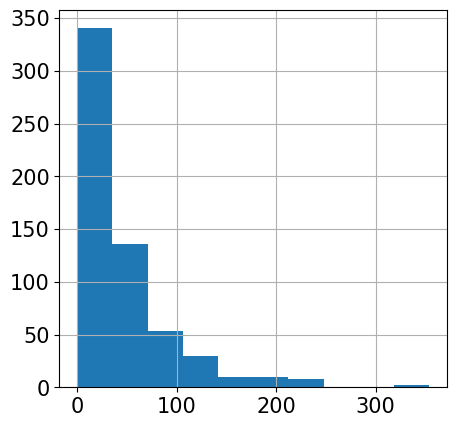

In [573]:
out_sum.hist()

In [574]:
out_sum.sum()

24395

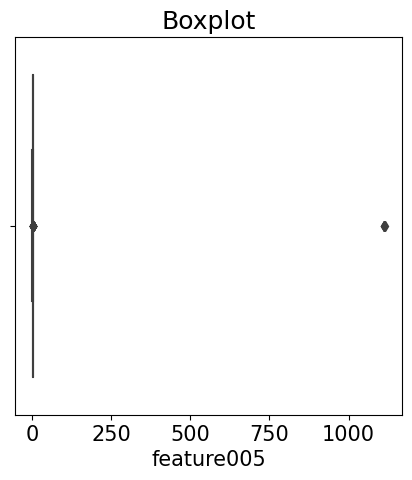

In [575]:
sns.boxplot(x= feature_data.iloc[:,4])  
plt.title('Boxplot')
plt.show()

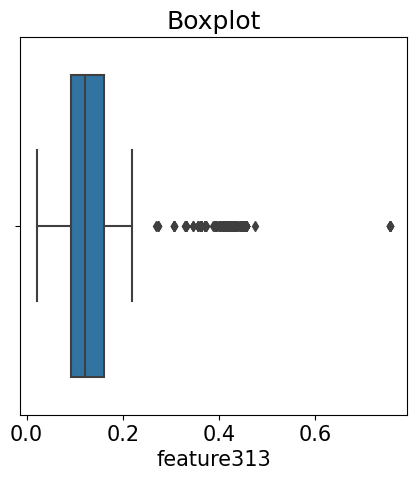

In [576]:
sns.boxplot(x= feature_data.iloc[:,312])  
plt.title('Boxplot')
plt.show()

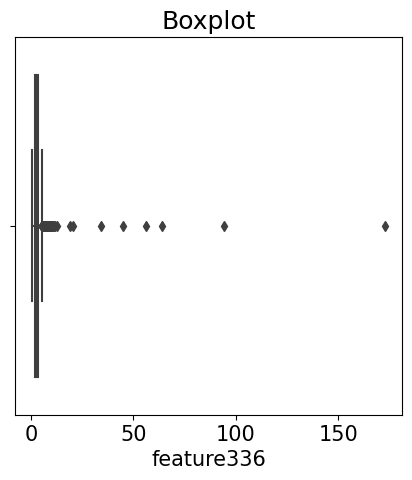

In [577]:
sns.boxplot(x= feature_data.iloc[:,335])  
plt.title('Boxplot')
plt.show()

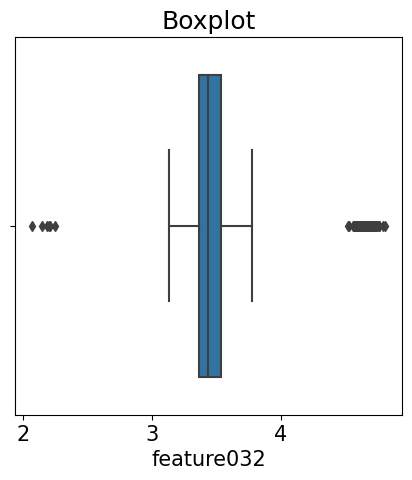

In [578]:
sns.boxplot(x= feature_data.iloc[:,31])  
plt.title('Boxplot')
plt.show()

In [579]:
out_sum[out_sum == 0]

feature266    0
feature540    0
feature395    0
feature264    0
feature543    0
             ..
feature410    0
feature489    0
feature235    0
feature487    0
feature323    0
Length: 138, dtype: int64

In [580]:
out_sum[out_sum != 0]

feature032    354
feature041    330
feature545    239
feature130    238
feature313    234
             ... 
feature343      1
feature272      1
feature441      1
feature075      1
feature348      1
Length: 452, dtype: int64

In [163]:
out_sum.feature125

7

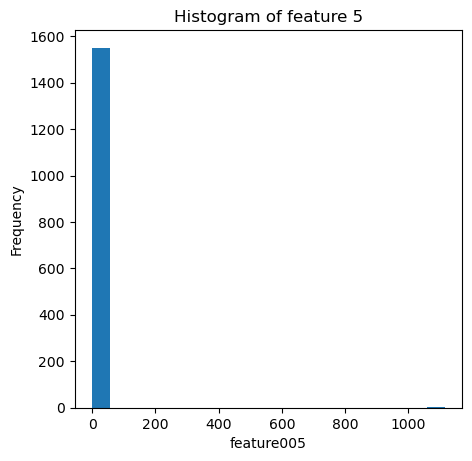

In [164]:
plt.hist(feature_data.iloc[:,4], bins = 20)
plt.xlabel('feature005')
plt.ylabel('Frequency')
plt.title('Histogram of feature 5')
plt.show()

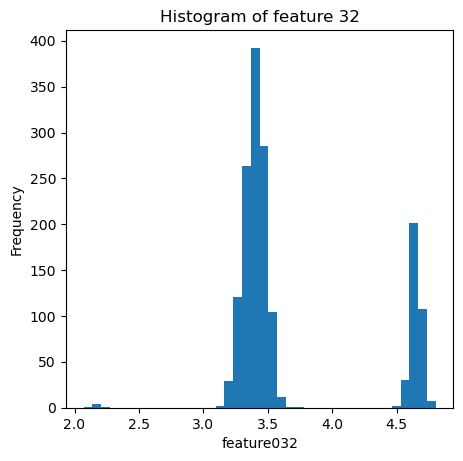

In [165]:
plt.hist(feature_data.iloc[:,31], bins =40)
plt.xlabel('feature032')
plt.ylabel('Frequency')
plt.title('Histogram of feature 32')
plt.show()

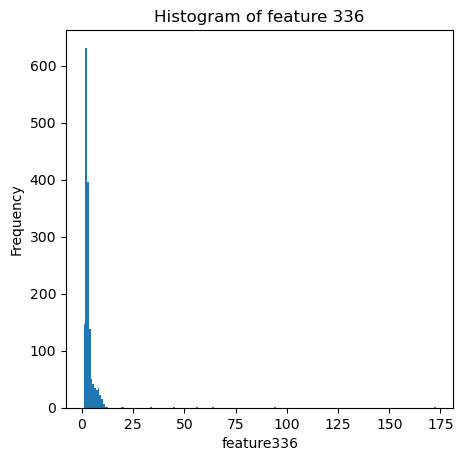

In [166]:
plt.hist(feature_data.iloc[:,335], bins =200)
plt.xlabel('feature336')
plt.ylabel('Frequency')
plt.title('Histogram of feature 336')
plt.show()

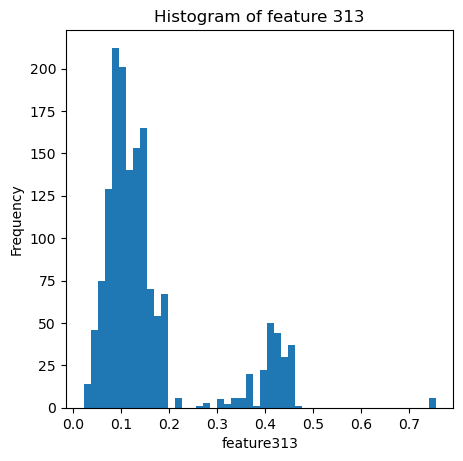

In [167]:
plt.hist(feature_data.iloc[:,312], bins =50)
plt.xlabel('feature313')
plt.ylabel('Frequency')
plt.title('Histogram of feature 313')
plt.show()

# 3. Data Splitting

Data splitting using stratified random sampling method in order to maintain the target feature ratio(Pass/Fail)  in train and test datasets with respect to the original dataset.

In [168]:
#check the ratio between pass(0) and fail(1)
raw_data['class'].value_counts()/len(raw_data)*100

0.0    93.93746
1.0     6.06254
Name: class, dtype: float64

In [169]:
#removing unrelevant features
# x is independent variable, y is dependent variable or target feature
X = raw_data.drop(['class', 'timestamp'], axis=1)
y = raw_data['class']

In [170]:
#Splitting data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40, shuffle=True, stratify = y)

In [171]:
#Check number of row in train and test set including features
print("{} rows in test set vs. {} in training set. {} Features.".format(X_test.shape[0], X_train.shape[0], X_test.shape[1]))

314 rows in test set vs. 1253 in training set. 590 Features.


In [172]:
#to check if the test and train data also has the same pass/fail ratio

fig = px.pie(
    y_train.value_counts(),
    values='class',
    names=["Pass", "Fail"],
    title="Class Distribution of Train data",
    width=500
)

fig.show()



import plotly.express as px
fig = px.pie(
    y_test.value_counts(),
    values='class',
    names=["Pass", "Fail"],
    title="Class Distribution of Test data",
    width=500
)

fig.show()

# 4. Data Cleaning 

### 4.1) Dimensionality Reduction

#### 4.1.1) Removing constants (std = 0)

In [173]:
# copy the train and test dataset before we do any modification of it. 
X_train_constant = X_train.copy()
X_test_constant = X_test.copy()

In [174]:
#Before removing constants
X_train_constant.shape

(1253, 590)

In [175]:
#For the test set before removing constants
X_test_constant.shape

(314, 590)

In [176]:
#number of features containing constants in the train set
len(X_train_constant.columns[X_train_constant.nunique() == 1])

116

In [178]:
#number of features containing constants in the test set
len(X_test_constant.columns[X_test_constant.nunique() == 1])

122

In [179]:
#Drop the constant features in the train set
X_train_constant.drop(list(X_train_constant[X_train_constant.columns[X_train_constant.nunique() == 1]].columns), axis = 1, inplace = True)

In [180]:
#Drop the constant features in the test set
X_test_constant.drop(list(X_test_constant[X_test_constant.columns[X_test_constant.nunique() == 1]].columns), axis = 1, inplace = True)

In [181]:
#After removing constant, it remains 474 columns (116 fearures were removed)
X_train_constant.shape

(1253, 474)

In [182]:
#Test set
#After removing constant, it remains 468 columns (122 fearures were removed)

X_test_constant.shape

(314, 468)

#### 4.1.2) Removing features containing 55% or more missing values

In [183]:
# copy the train and test dataset before we do any modification of it. 
X_train_con_na = X_train_constant.copy()
X_test_con_na = X_test_constant.copy()

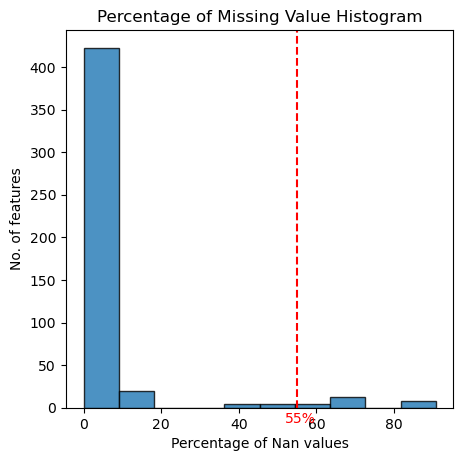

In [184]:
# Percentage Missing Value histogram
nan_perc = pd.DataFrame(round((X_train_con_na.isnull().sum() * 100/ len(X_train_con_na)),2))
nan_perc = nan_perc.reset_index()
nan_perc = nan_perc.rename({'index': 'feature', 0: 'percentage'}, axis=1)

%matplotlib inline
plt.rcParams.update({'figure.figsize':(5,5), 'figure.dpi':100})
n,bins,patch = plt.hist(nan_perc['percentage'],bins=10, alpha=0.8, label='Value', edgecolor='black', linewidth=1)
plt.gca().set(title='Percentage of Missing Value Histogram', ylabel='No. of features', xlabel='Percentage of Nan values');

# add a vertical red line at 55% of missing values
plt.axvline(x=55, color='red', linestyle= '--')
plt.text(52,-18,'55%',fontsize=10, color="red")
plt.show()

In [185]:
## Function to remove features containing more than 55% missing values

#1 start from the first column(begin with column 0) and count the NA of that column.
#2 Use While loop to iterate until the last column.
#3 If the percentage of NA is higher than 55%, we delete the column.
#4 Otherwise i plus 1 to the next column. 

def remove_na(dataframe,threshold = 0.55):   # threshold = 0.55 as default value
    i = 0
    while i < len(dataframe.columns):    
        if dataframe.iloc[:,i].isnull().sum()/len(dataframe) > threshold:
            dataframe.drop(dataframe.columns[[i]], axis = 1,inplace = True)
        else:
            i += 1

In [186]:
# Implement function remove_na on train and test dataset 
remove_na(X_train_con_na)
remove_na(X_test_con_na)

In [80]:
# Another option
# Create a boolean mask on whether each feature less than 55% missing values.
#mask = X_train.isna().sum() / len(X_train) < 0.55

# Create a reduced dataset by applying the mask
#reduced_df = X_train.loc[:, mask]

In [187]:
# check the dimension of train dataset after deletion of variables over 55% NA. 450 columns remain. (24 features were removed)
X_train_con_na.shape

(1253, 450)

In [188]:
#Check the test set (20 features were removed)
X_test_con_na.shape

(314, 448)

#### 4.1.3) Removing features with low variance

In [189]:
# copy the train and test dataset before we do any modification 
X_train_low_con_na = X_train_con_na.copy()
X_test_low_con_na = X_test_con_na.copy()

In [190]:
# Check the copy
X_train_low_con_na.shape

(1253, 450)

<AxesSubplot:>

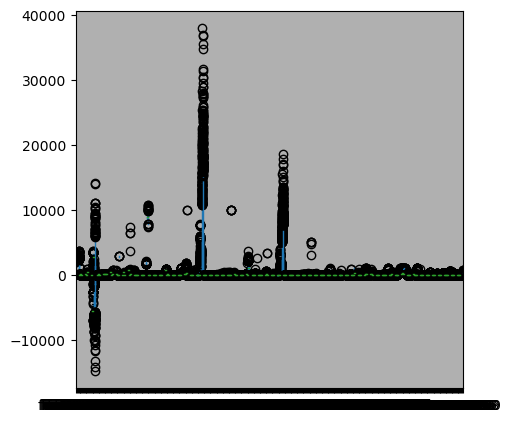

In [191]:
X_train_low_con_na.boxplot()

In [65]:
#Approach 1
#Normalized the data / normalize the variance
#X_train_nor = X_train_55 / X_train_55.mean()

In [192]:
#print(X_train_nor.var())

In [61]:
#from sklearn.feature_selection import VarianceThreshold
#sel = VarianceThreshold(threshold=0.001)

In [62]:
#?VarianceThreshold

In [193]:
#sel.fit(X_train_nor)

In [64]:
#mask = sel.get_support()

In [194]:
#reduced_X_train = X_train_55.loc[:, mask]

#print("Dimensionality reduced from {} to {}.".format(X_train_55.shape[1], reduced_X_train.shape[1]))

#remove 47 columns

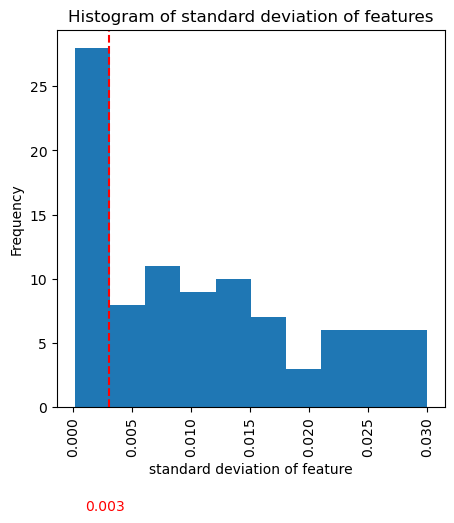

In [200]:
####Approach 2 - using standard deviation
#Train set
X_train_std = X_train_low_con_na.std() 

plt.hist(X_train_std, bins = 10, range =[X_train_std.min(),0.03])
plt.xlabel('standard deviation of feature')
plt.ylabel('Frequency')
plt.title('Histogram of standard deviation of features')
plt.xticks(rotation='vertical')

#add a vertical red threshold line x= 0.003
plt.axvline(x=0.003, color='red', linestyle='--')
plt.text(0.0010,-8,'0.003',fontsize=10, color="r")
plt.show()



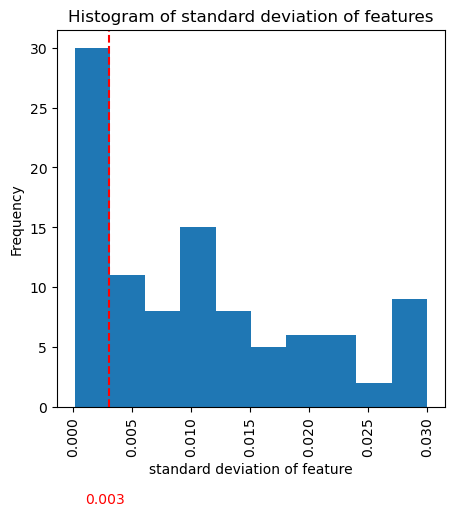

In [201]:
#Test set
X_test_std = X_test_low_con_na.std() 

plt.hist(X_test_std, bins = 10, range =[X_test_std.min(),0.03])
plt.xlabel('standard deviation of feature')
plt.ylabel('Frequency')
plt.title('Histogram of standard deviation of features')
plt.xticks(rotation='vertical')

#add a vertical red threshold line x= 0.003
plt.axvline(x=0.003, color='red', linestyle='--')
plt.text(0.0010,-8,'0.003',fontsize=10, color="r")
plt.show()



In [202]:
# Create a reduced dataset by applying the mask

mask1 = X_train_std > 0.003
mask2 = X_test_std > 0.003

X_train_cleaned = X_train_low_con_na.loc[:, mask1]
X_test_cleaned = X_test_low_con_na.loc[:, mask2]

print("Train set: Dimensionality reduced from {} to {}.".format(X_train_low_con_na.shape[1], X_train_cleaned.shape[1]))
#remove 26 features
print("Test set: Dimensionality reduced from {} to {}.".format(X_test_low_con_na.shape[1], X_test_cleaned.shape[1]))

Train set: Dimensionality reduced from 450 to 424.
Test set: Dimensionality reduced from 448 to 419.


In [203]:
#Approach 3 - reduction according to coefficient standard deviation of features
#X_coeffstd2 = X_train_55.std() / abs(X_train_55.mean())

#plt.hist(X_coeffstd2, bins = 10, range =[X_coeffstd2.min(),0.1])
#plt.xlabel('Coefficient of variation')
#plt.ylabel('Frequency')
#plt.title('Histogram of coefficient standard deviation of features')
#plt.xticks(rotation='vertical')

# add a vertical red threshold line x= 0.022
#plt.axvline(x=0.022, color='red', linestyle='--')
#plt.text(0.025, -1,'0.022',fontsize=10, color="r")
#plt.show()

In [204]:
# Create a reduced dataset by applying the mask

#mask = X_coeffstd2 > 0.022

#reduced_df2 = X_train_55.loc[:, mask]

#print("Dimensionality reduced from {} to {}.".format(X_train_55.shape[1], reduced_df2.shape[1]))
##remove 37 features

In [209]:
#Check-point
print('Train set =',X_train_cleaned.shape)
print('Test set =', X_test_cleaned.shape)

Train set = (1253, 424)
Test set = (314, 419)


In [206]:
X_train_cleaned.head()

,feature001,feature002,feature003,feature004,feature005,feature007,feature008,feature009,feature010,feature011,...,feature576,feature577,feature578,feature583,feature584,feature585,feature586,feature587,feature588,feature590
ID,,,,,,,,,,,,,,,,,,,,,
1379.0,3013.79,2480.71,2206.4000,982.5452,1.1853,116.8167,0.1228,1.4226,-0.0076,0.0293,...,0.0775,1.5230,13.1304,0.4953,0.0148,0.0038,2.9952,0.0025,0.0260,0.0000
822.0,3009.71,2565.53,2224.6778,1308.6479,1.3907,101.1333,0.1208,1.4440,-0.0079,-0.0076,...,0.0944,1.9884,14.8682,0.4979,0.0078,0.0024,1.5724,0.0275,0.0215,78.1199
1338.0,2915.54,2496.52,2210.8556,1665.0062,2.4475,97.1056,0.1227,1.5656,-0.0027,0.0092,...,0.2767,86.7573,91.1106,0.5005,0.0117,0.0029,2.3366,0.0239,0.0203,85.0589
1313.0,2986.79,2527.32,2189.6778,1295.2883,2.1394,107.4811,0.1238,1.4418,0.0076,0.0123,...,0.3315,83.9190,67.3679,0.4990,0.0146,0.0035,2.9212,0.0259,0.0112,43.2861
1533.0,3169.64,2563.95,2167.4222,2837.8788,1.4892,83.8222,0.1255,1.4378,-0.0007,0.0043,...,0.1213,1.0187,17.8379,0.5007,0.0247,0.0051,4.9372,0.0168,0.0349,207.2955


### 4.2 Outlier identification and replacement

Replacing outliers using 3S rules with NaN before imputation

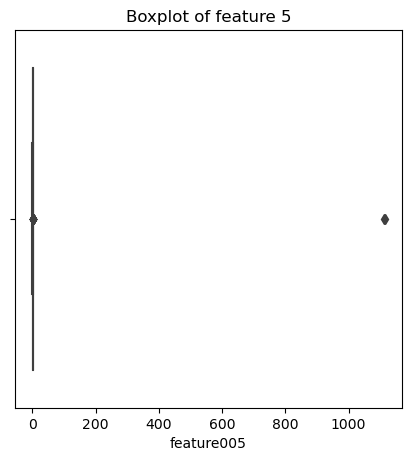

In [210]:
# check the outlier using boxplot showing one extreme outlier in feature 5
sns.boxplot(x= X_train_cleaned.iloc[:,4])
plt.title('Boxplot of feature 5')
plt.show()

In [211]:
#current number of missing values
X_train_cleaned.isna().sum().sum()

10862

In [220]:
#For test set, current number of missing values
X_test_cleaned.isna().sum().sum()

3571

In [212]:
z_x_train= pd.DataFrame(stats.zscore(X_train_cleaned,nan_policy='omit'))
z_x_train

,0,1,2,3,4,5,6,7,8,9,...,414,415,416,417,418,419,420,421,422,423
0,-0.007182,-0.200598,0.199882,-0.946784,-0.043434,2.527088,0.102694,-0.549450,-0.461003,3.099752,...,-0.402738,-0.236629,-0.279926,-1.390322,-0.039055,-0.023584,-0.030085,-1.547926,1.091205,-1.066333
1,-0.061559,0.852874,0.823371,-0.207700,-0.038826,-0.004623,-0.148309,-0.257624,-0.480429,-0.831736,...,-0.150019,-0.209140,-0.140800,-0.631040,-0.406736,-0.362416,-0.388633,0.461209,0.579639,-0.211646
2,-1.316651,-0.004237,0.351871,0.599956,-0.015116,-0.654799,0.090144,1.400603,-0.143696,0.958210,...,2.576060,4.797753,5.963082,0.128242,-0.201885,-0.241405,-0.196053,0.171893,0.443221,-0.135728
3,-0.367036,0.378302,-0.370543,-0.237978,-0.022028,1.020078,0.228195,-0.287625,0.523295,1.288497,...,3.395528,4.630108,4.062268,-0.309805,-0.049560,-0.096191,-0.048733,0.332624,-0.591279,-0.592752
4,2.069977,0.833251,-1.129722,3.258172,-0.036616,-2.799087,0.441547,-0.342172,-0.014183,0.436142,...,0.252238,-0.266416,0.096951,0.186648,0.480952,0.291047,0.459303,-0.398701,2.102969,1.201628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,0.350540,0.628071,-0.875780,-0.818315,-0.046570,0.393567,0.014843,1.688338,0.588051,3.696401,...,-0.142542,-0.195041,-0.251465,0.069836,-0.102086,-0.071988,-0.098125,0.477282,1.750557,0.189111
1249,0.128230,-0.431860,-0.867061,-0.897019,-0.040941,0.775970,0.366246,1.722430,-1.341690,0.627922,...,-0.156001,-0.238425,-0.185849,0.507883,0.071250,0.121630,0.062803,-0.760345,1.329936,1.424455
1250,1.099303,-0.247298,0.176761,-1.118109,-0.039867,0.726105,-0.248709,-0.403537,0.173610,-0.501449,...,-0.218807,-0.207445,-0.136837,0.799914,0.438931,0.266844,0.410793,-1.170208,0.522798,2.126211
1251,0.327883,-3.840183,0.634238,-0.526646,-0.049830,-0.520460,-0.211059,-0.661272,-0.363868,-0.789118,...,-0.241237,-0.232849,-0.371049,0.887524,-0.149359,-0.217202,-0.147619,-0.229934,-1.046005,-0.651766


In [214]:
# calculating the number of outliers
sum(z_x_train.apply(lambda x: sum(x.apply(lambda x: 1 if ((x>3) | (x<-3)) else 0))))

4626

In [225]:
# replacing outliers with NA to impute all NA values
is_outlier = abs(z_x_train)>3
is_outlier.columns = X_train_cleaned.columns
is_outlier.index = X_train_cleaned.index
X_train_o = X_train_cleaned.mask(is_outlier, np.nan)

In [226]:
# new total number of NA
X_train_o.isna().sum().sum()

15488

In [227]:
X_train_o.head()

,feature001,feature002,feature003,feature004,feature005,feature007,feature008,feature009,feature010,feature011,...,feature576,feature577,feature578,feature583,feature584,feature585,feature586,feature587,feature588,feature590
ID,,,,,,,,,,,,,,,,,,,,,
1379.0,3013.79,2480.71,2206.4000,982.5452,1.1853,116.8167,0.1228,1.4226,-0.0076,NaN,...,0.0775,1.5230,13.1304,0.4953,0.0148,0.0038,2.9952,0.0025,0.0260,0.0000
822.0,3009.71,2565.53,2224.6778,1308.6479,1.3907,101.1333,0.1208,1.4440,-0.0079,-0.0076,...,0.0944,1.9884,14.8682,0.4979,0.0078,0.0024,1.5724,0.0275,0.0215,78.1199
1338.0,2915.54,2496.52,2210.8556,1665.0062,2.4475,97.1056,0.1227,1.5656,-0.0027,0.0092,...,0.2767,NaN,NaN,0.5005,0.0117,0.0029,2.3366,0.0239,0.0203,85.0589
1313.0,2986.79,2527.32,2189.6778,1295.2883,2.1394,107.4811,0.1238,1.4418,0.0076,0.0123,...,NaN,NaN,NaN,0.4990,0.0146,0.0035,2.9212,0.0259,0.0112,43.2861
1533.0,3169.64,2563.95,2167.4222,NaN,1.4892,83.8222,0.1255,1.4378,-0.0007,0.0043,...,0.1213,1.0187,17.8379,0.5007,0.0247,0.0051,4.9372,0.0168,0.0349,207.2955


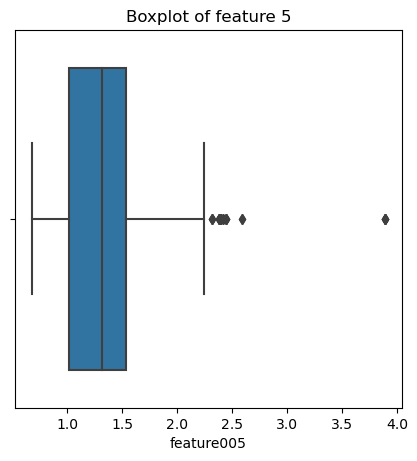

In [228]:
# check again the boxplot of feature 5 after replacing the extreme outlier with NA.
sns.boxplot(x= X_train_o.iloc[:,4])
plt.title('Boxplot of feature 5')
plt.show()

In [229]:
X_train_o.shape

(1253, 424)

In [234]:
#Change outlier in the test set
z_x_test= pd.DataFrame(stats.zscore(X_test_cleaned,nan_policy='omit'))

outlier_test = abs(z_x_test)>3
outlier_test.columns = X_test_cleaned.columns
outlier_test.index = X_test_cleaned.index
X_test_o = X_test_cleaned.mask(outlier_test, np.nan)  

In [233]:
# new total number of NA for test set (changed 1,264 outliers to NaN)
X_test_o.isna().sum().sum()

4835

### 4.3 Missing Value Imputation

4.3.1 k-Nearest Neighbor Imputation (Not effective)

In [236]:
#from sklearn.impute import KNNImputer
#import time

#start = time.time()

#KNN_imputer = KNNImputer(n_neighbors=20)
#X_train_knn = X_train_o.copy(deep=True)
#X_train_knn.iloc[:,:] = KNN_imputer.fit_transform(X_train_knn)

#end = time.time()

#print('Run time:',end - start)

In [237]:
#X_train_knn.isna().sum().sum()

### 4.3.2 MICE Imputation

In [239]:
# Assiging the imputed dataframes to new variables to perform MICE imputation.
X_train_mice = X_train_o.copy()
X_test_mice = X_test_o.copy()

In [240]:
# impute missing values on train dataset
start = time.time()

MICE_imputer = IterativeImputer(max_iter=20, random_state=40)
X_train_mice.iloc[:,:] = MICE_imputer.fit_transform(X_train_mice)

end = time.time()

print('Run time:',(end - start)/60)

Run time: 11.820990900198618


/opt/anaconda3/envs/SECOM/lib/python3.8/site-packages/sklearn/impute/_iterative.py:685: ConvergenceWarning:

[IterativeImputer] Early stopping criterion not reached.



In [246]:
# impute missing values on test dataset
start = time.time()

MICE_imputer = IterativeImputer(max_iter=20, random_state=40)
X_test_mice.iloc[:,:] = MICE_imputer.fit_transform(X_test_mice)

end = time.time()

print('Run time:',(end - start)/60)

Run time: 4.347151935100555


/opt/anaconda3/envs/SECOM/lib/python3.8/site-packages/sklearn/impute/_iterative.py:685: ConvergenceWarning:

[IterativeImputer] Early stopping criterion not reached.



In [247]:
X_train_mice.isna().sum().sum()

0

In [248]:
X_test_mice.isna().sum().sum()

0

In [249]:
print(X_train_mice.shape)
print(X_test_mice.shape)

(1253, 424)
(314, 419)


In [250]:
#Evaluation of imputation

#density plots

#X_train_z['feature145'].plot(kind='kde',c='red',linewidth=1, alpha =0.4)
#X_train_knn['feature145'].plot(kind='kde', linewidth =1)
#X_train_mice['feature145'].plot(kind='kde', linewidth =1)
#labels = ['Baseline', 'KNN','MICE']
#plt.legend(labels)
#plt.xlabel('feature145')
#plt.show()

## 5. Feature Selection

After data preprocessing listed above, we still have 424 features in training dataset. Feature selection enables to choose the most important features and avoid redudant and noise in the input. 

In the second presentation we compared 2 different methods, namely, Boruta(feature selection) and PCA (feature reduction)

#### 5.1 PCA

In [283]:
X_train_mice_pca = X_train_mice.copy(deep=True)

In [284]:
# Pipeline a scaler and pca selecting 10 components
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reducer', PCA(n_components= 0.8))])  

In [285]:
# Fit the pipe to the data
X_train_pca = pipe.fit_transform(X_train_mice_pca)
print("By using PCA we have {} features".format(X_train_pca.shape[1]))

By using PCA we have 91 features


In [286]:
# Inspect the explained variance ratio per component
print(pca.explained_variance_ratio_)

[4.26278053e-02 3.89700382e-02 2.90901292e-02 2.78629931e-02
 2.01955276e-02 1.91155861e-02 1.82892298e-02 1.77932818e-02
 1.57561887e-02 1.51836484e-02 1.49075912e-02 1.43775339e-02
 1.36923265e-02 1.33118357e-02 1.28664972e-02 1.26113311e-02
 1.22044380e-02 1.13428215e-02 1.11156162e-02 1.09282669e-02
 1.05319938e-02 1.01792804e-02 1.01114879e-02 9.82470621e-03
 9.63326275e-03 9.30102088e-03 9.15156540e-03 8.98132025e-03
 8.69927385e-03 8.47234577e-03 8.44194561e-03 8.21404852e-03
 8.09409818e-03 7.89610533e-03 7.84079144e-03 7.69810930e-03
 7.56954315e-03 7.42480151e-03 7.38826090e-03 7.33418191e-03
 7.23876732e-03 7.04955082e-03 7.01743356e-03 6.91890546e-03
 6.82979061e-03 6.73868102e-03 6.58037859e-03 6.55963515e-03
 6.47354742e-03 6.33418307e-03 6.23046938e-03 6.12227141e-03
 5.97533029e-03 5.94666526e-03 5.87505130e-03 5.82083727e-03
 5.74364164e-03 5.68386626e-03 5.57748160e-03 5.46464546e-03
 5.34812751e-03 5.25808803e-03 5.03425215e-03 4.98086290e-03
 4.97492304e-03 4.837591

In [287]:
print(pca.explained_variance_ratio_.cumsum())

[0.04262781 0.08159784 0.11068797 0.13855097 0.15874649 0.17786208
 0.19615131 0.21394459 0.22970078 0.24488443 0.25979202 0.27416955
 0.28786188 0.30117372 0.31404021 0.32665154 0.33885598 0.3501988
 0.36131442 0.37224269 0.38277468 0.39295396 0.40306545 0.41289015
 0.42252342 0.43182444 0.440976   0.44995732 0.4586566  0.46712894
 0.47557089 0.48378494 0.49187904 0.49977514 0.50761593 0.51531404
 0.52288359 0.53030839 0.53769665 0.54503083 0.5522696  0.55931915
 0.56633658 0.57325549 0.58008528 0.58682396 0.59340434 0.59996397
 0.60643752 0.6127717  0.61900217 0.62512444 0.63109977 0.63704644
 0.64292149 0.64874233 0.65448597 0.66016984 0.66574732 0.67121196
 0.67656009 0.68181818 0.68685243 0.69183329 0.69680822 0.70164581
 0.70644375 0.71116418 0.71574653 0.72031385 0.72485886 0.72932212
 0.73370975 0.73799001 0.74220276 0.74632076 0.75031579 0.75428363
 0.75823178 0.76214646 0.76599104 0.7697332  0.77344994 0.77708395
 0.78064365 0.78415037 0.78758398 0.79100391 0.79434547 0.79764

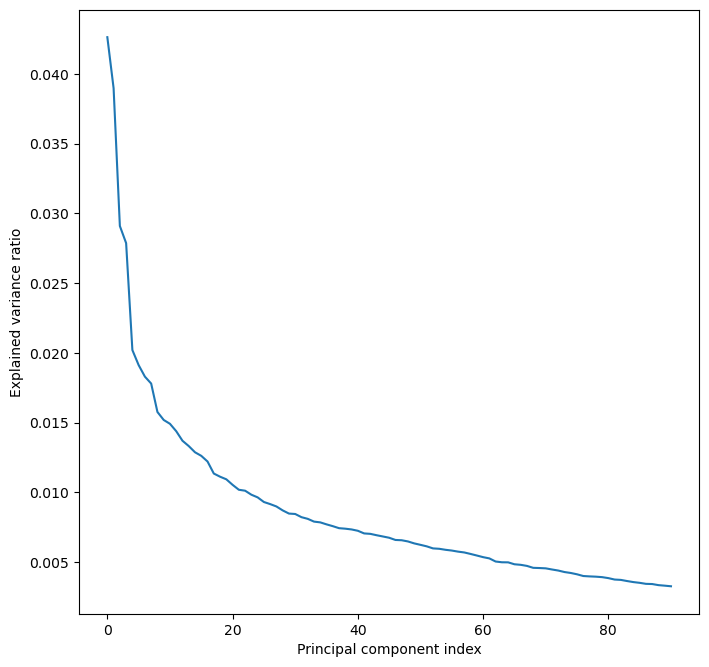

In [288]:
#Check the elbow point where is the optimal number of components

var = pipe.steps[1][1].explained_variance_ratio_

figure(figsize=(8, 8), dpi=100)
plt.plot(var)
plt.xlabel('Principal component index')
plt.ylabel('Explained variance ratio')
plt.show()

In [289]:
X_train_pca.shape

(1253, 91)

In [290]:
X_train_mice_reverse = pipe.inverse_transform(X_train_pca)

In [291]:
print(X_train_mice_reverse.shape)

(1253, 424)


#### 5.2 BORUTA

In [253]:
# NOTE BorutaPy accepts numpy arrays only, hence the .values attribute
X_train_b = X_train_mice.values
y_train_b = y_train.values
y_train_b = y_train_boruta.ravel()


start = time.time()
# define random forest classifier
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)

# define Boruta feature selection method
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1)

# find all relevant features
feat_selector.fit(X_train_b, y_train_b)

# call transform() on X to filter it down to selected features
X_train_boruta_tf = feat_selector.transform(X_train_b)

end = time.time()

print('Run time:',end - start)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	424
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	424
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	424
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	424
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	424
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	424
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	424
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	35
Rejected: 	389
Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	33
Rejected: 	389
Iteration: 	10 / 100
Confirmed: 	2
Tentative: 	33
Rejected: 	389
Iteration: 	11 / 100
Confirmed: 	2
Tentative: 	33
Rejected: 	389
Iteration: 	12 / 100
Confirmed: 	4
Tentative: 	28
Rejected: 	392
Iteration: 	13 / 100
Confirmed: 	4
Tentative: 	28
Rejected: 	392
Iteration: 	14 / 100
Confirmed: 	4
Tentative: 	28
Rejected: 	392
Iteration: 	15 / 100
Confirmed: 	4
Tentative: 	28
Rejected: 	392
Iteration: 	16 / 100
Confirmed: 	4
Tentat

In [255]:
# Make a list and count the selected features
selected_feat= X_train_mice.columns[(feat_selector.support_)]
len(selected_feat)

18

In [256]:
# Return the name of selected features
print(selected_feat)

Index(['feature060', 'feature065', 'feature066', 'feature080', 'feature092',
       'feature103', 'feature113', 'feature126', 'feature153', 'feature183',
       'feature206', 'feature248', 'feature288', 'feature291', 'feature461',
       'feature478', 'feature511', 'feature520'],
      dtype='object')


In [257]:
# create a dataframe with selected features 
X_train_boruta = pd.DataFrame(X_train_mice, columns = selected_feat)

In [258]:
# an overview of descriptive statistics of selected features
X_train_boruta.describe()

,feature060,feature065,feature066,feature080,feature092,feature103,feature113,feature126,feature153,feature183,feature206,feature248,feature288,feature291,feature461,feature478,feature511,feature520
count,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000
mean,2.678912,20.546215,26.646257,0.002334,0.002696,-0.000044,0.462112,1.180460,0.603351,10.722456,8.312270,0.046054,0.180004,0.098236,28.901037,5.633241,51.643556,9.890550
std,8.038923,4.983940,9.515971,0.020994,0.080519,0.055950,0.005951,0.266817,0.486285,3.700839,4.662187,0.037023,0.150043,0.058329,12.043640,3.087938,24.137710,7.940560
min,-21.205500,6.448200,-236.280049,-0.056800,-0.257000,-0.166900,0.398900,0.605500,0.154400,3.320000,-101.361260,0.000000,0.051300,0.041600,7.953400,-65.541715,0.000000,0.000000
25%,-1.882700,17.428200,23.046900,-0.010900,-0.040200,-0.036100,0.459300,0.974400,0.370600,7.790000,6.020000,0.024800,0.114500,0.065500,20.345000,4.090500,35.193100,5.369600
50%,0.951800,20.004500,26.247000,-0.000100,0.000100,-0.000600,0.462080,1.135000,0.469900,10.300000,7.740000,0.041421,0.139100,0.084000,26.164400,5.243500,46.658600,9.174292
75%,4.169100,22.855500,29.904400,0.012500,0.047500,0.030100,0.464959,1.333000,0.695000,13.350000,9.950000,0.049882,0.201800,0.116600,35.528000,6.703800,62.705400,10.561935
max,29.750900,49.723373,52.565693,0.071300,0.261200,0.187000,0.488500,2.022000,5.865800,22.000000,34.670000,0.252924,1.785100,0.552800,89.049688,23.100200,160.000000,55.165100


In [259]:
# For the test dataset to have the same selected features from training dataset
X_test_boruta = pd.DataFrame(X_test_mice, columns= selected_feat)
X_test_boruta.shape

(314, 18)

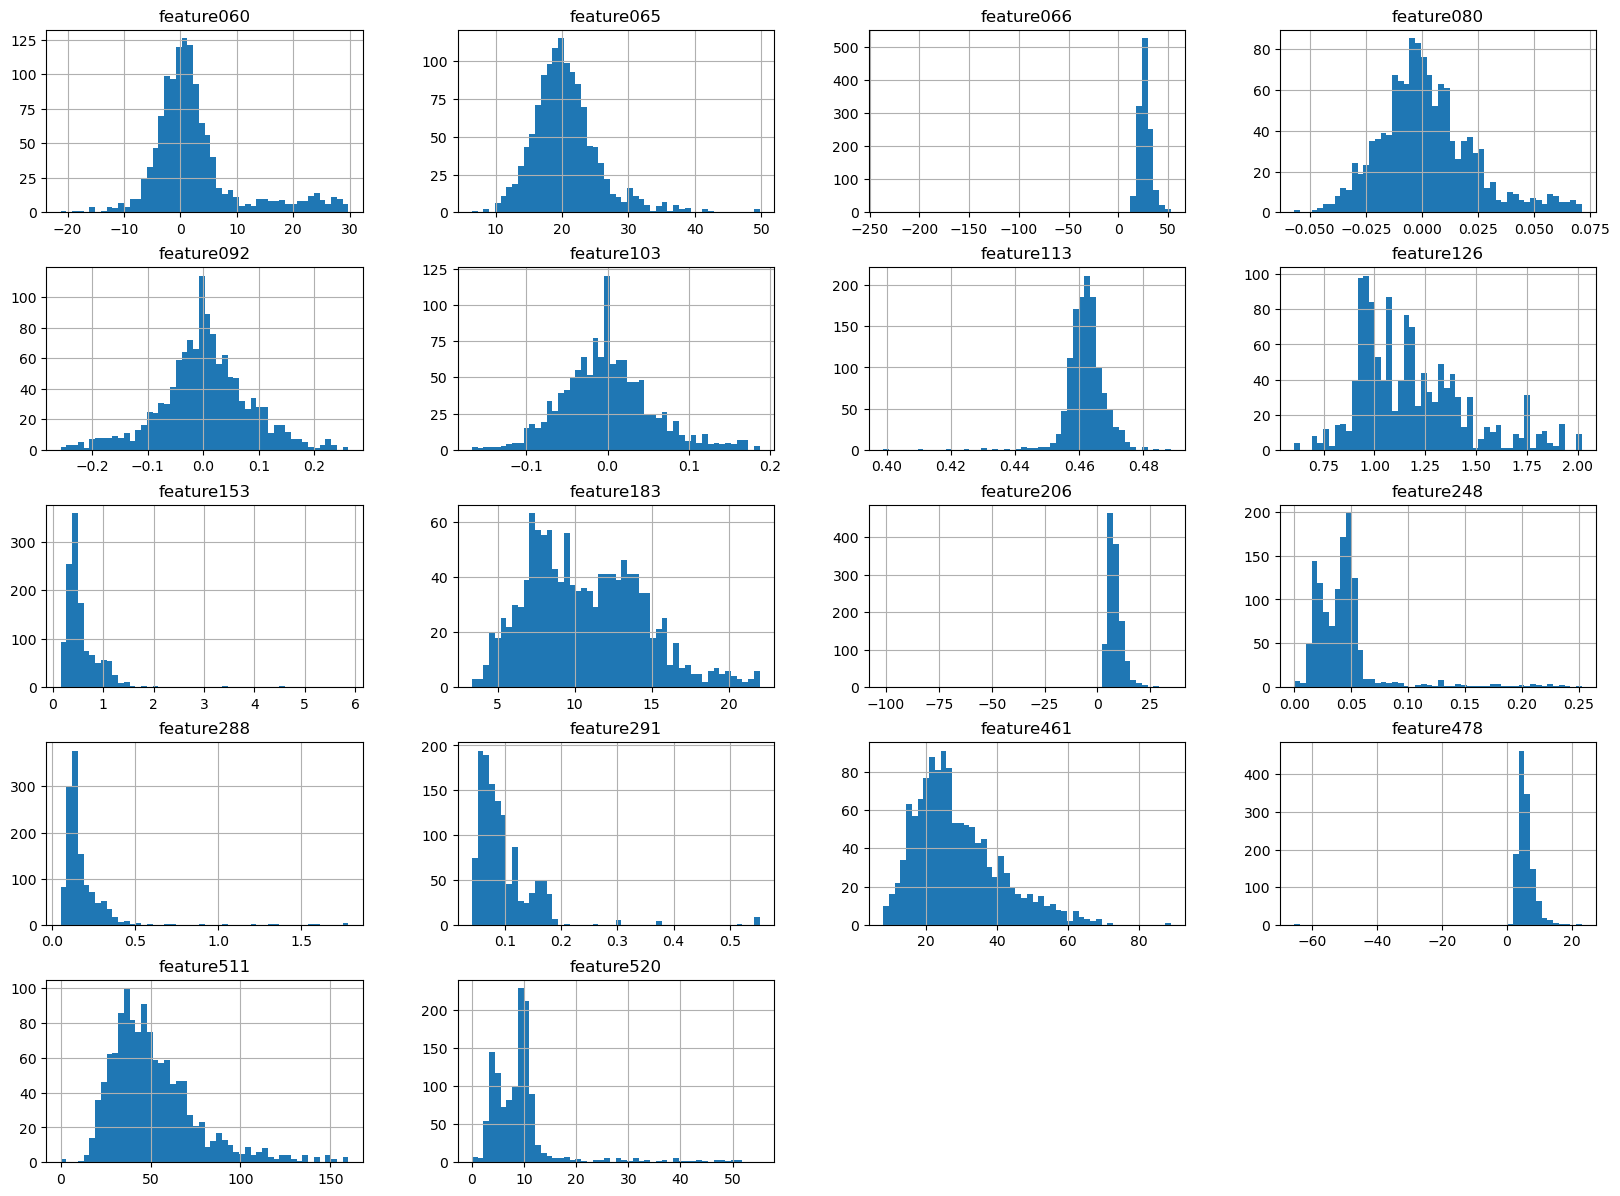

In [260]:
# histogram of remaining features
X_train_boruta.hist(bins=50, figsize=(20,15))
plt.show()

## 6. Dealing with Imbalanced data

In Secom case, our dataset is imbalanced as the fail cases is less than the pass cases. In order to improve the performance of model, oversampling methods are required. Here we will use SMOTE, ADASYN and SMOTEENN.

Method 1: SMOTE

In [327]:
print("Before oversampling, count of label '1':{}".format(sum(y_train == 1)))
print("Before oversampling, count of label '0':{} \n".format(sum(y_train == 0)))

sm = SMOTE(random_state=40)

X_train_smote, y_train_smote = sm.fit_resample(X_train_boruta, y_train.ravel())

print('After OverSampling, the shape of X_train: {}'.format(X_train_smote.shape))
print('After OverSampling, the shape of y_train: {} \n'.format(y_train_smote.shape))

print("After oversampling, count of label '1':{}".format(sum(y_train_smote == 1)))
print("After oversampling, count of label '0':{} \n".format(sum(y_train_smote == 0)))

Before oversampling, count of label '1':76
Before oversampling, count of label '0':1177 

After OverSampling, the shape of X_train: (2354, 18)
After OverSampling, the shape of y_train: (2354,) 

After oversampling, count of label '1':1177
After oversampling, count of label '0':1177 



Method 2: ADASYN

In [331]:
X_train_adasyn, y_train_adasyn = ADASYN().fit_resample(X_train_boruta, y_train.ravel())
print('After OverSampling, the shape of X_train: {}'.format(X_train_adasyn.shape))
print('After OverSampling, the shape of y_train: {} \n'.format(y_train_adasyn.shape))

print("After oversampling, count of label '1':{}".format(sum(y_train_adasyn == 1)))
print("After oversampling, count of label '0':{} \n".format(sum(y_train_adasyn == 0)))

After OverSampling, the shape of X_train: (2360, 18)
After OverSampling, the shape of y_train: (2360,) 

After oversampling, count of label '1':1183
After oversampling, count of label '0':1177 



Method 3: SMOTEENN

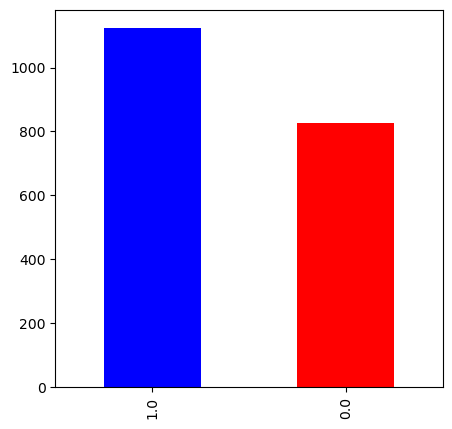

In [270]:
X_train_smote_enn, y_train_smote_enn = SMOTEENN().fit_resample(X_train_boruta, y_train)

y_train_smote_enn.value_counts().plot.bar(color = ['blue', 'red'])
plt.show()

In [330]:
X_train_smoteenn, y_train_smoteenn = SMOTEENN(random_state = 40).fit_resample(X_train_boruta, y_train.ravel())
print('After OverSampling, the shape of X_train: {}'.format(X_train_smoteenn.shape))
print('After OverSampling, the shape of y_train: {} \n'.format(y_train_smoteenn.shape))

print("After oversampling, count of label '1':{}".format(sum(y_train_smoteenn == 1)))
print("After oversampling, count of label '0':{} \n".format(sum(y_train_smoteenn == 0)))

After OverSampling, the shape of X_train: (1944, 18)
After OverSampling, the shape of y_train: (1944,) 

After oversampling, count of label '1':1111
After oversampling, count of label '0':833 



Visualization of imbalanced technique before and after oversampling.

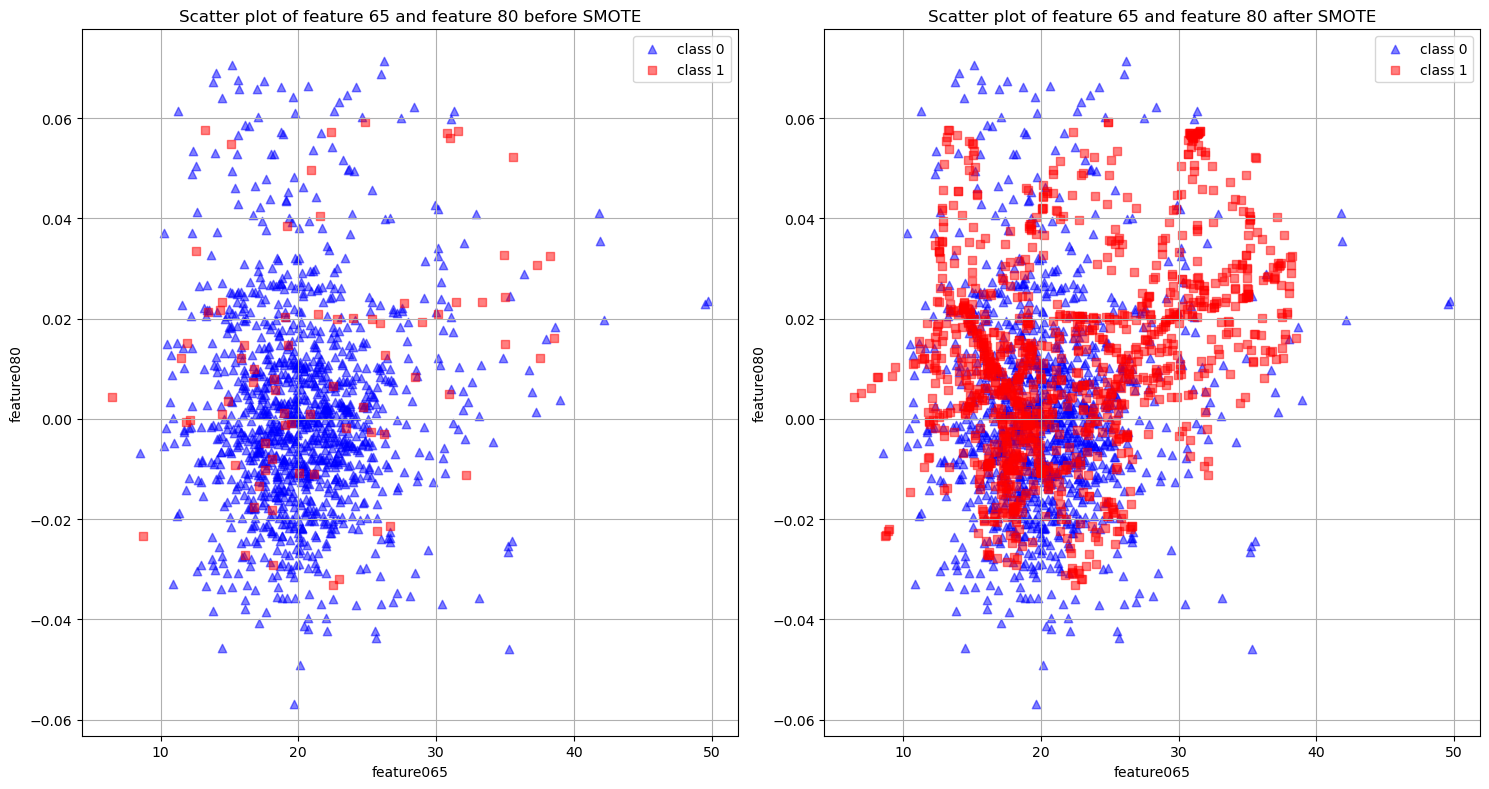

In [321]:
#EXAMPLE 1. SMOTE
# plot two subgraphs in one row.
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 8))

# l is the class either 0 or 1. m is the type of the points.

# Before SMOTE
for l, c, m in zip((0,1), ('blue', 'red'), ('^', 's')):
    ax1.scatter(X_train_boruta_tf[y_train == l,1],
                X_train_boruta_tf[y_train == l,3],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )
# After SMOTE  
for l, c, m in zip((0, 1), ('blue', 'red'), ('^', 's')):
    ax2.scatter(X_train_smote.values[y_train_smote == l,1],    
                X_train_smote.values[y_train_smote == l,3],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

ax1.set_title('Scatter plot of feature 65 and feature 80 before SMOTE')
ax2.set_title('Scatter plot of feature 65 and feature 80 after SMOTE')

for ax in (ax1, ax2):
    ax.set_xlabel(X_train_boruta.columns[1])
    ax.set_ylabel(X_train_boruta.columns[3])
    ax.legend(loc='upper right')
    ax.grid()

plt.tight_layout()

plt.show()

## 7. Transformation (Data scaling)

- Models like KNN and SVM require data scaling (linear transformation) as they are sensitive to the input data and expect normally distributed features.

- Models like Random Forest and Naive Bayes are very robust and not required data scaling to have normal distribution.

###### Two methods are defined here: one is Standardization and the other is MinMax scaling.

Method 1 : Standardization (mean=0, std=1)

In [333]:
# create standardized scaler
sc = StandardScaler()

# standardize the train dataset using MICE AFTER boruta feature selection and SMOTE
X_train_std = sc.fit_transform(X_train_smote)

# standardize the test dataset using MICE AFTER boruta feature selection only
X_test_std = sc.fit_transform(X_test_boruta)

# Convert the numpy array back to the dataframe
X_train_std_df= pd.DataFrame(X_train_std, columns = selected_feat)
X_test_std_df = pd.DataFrame(X_test_std, columns = selected_feat)

Method 2: Min-Max scaling with the range 0:1

In [336]:
## scale the imputed data to the range from 0 to 1 (default range)
#create a min-max scaler called mmsc
mmsc = MinMaxScaler()

# Scale imputed values by using MICE in train and test dataset AFTER boruta feature selection and SMOTE
X_train_minmax = mmsc.fit_transform(X_train_smote)
# Scale imputed values by using MICE in train and test dataset AFTER boruta feature selection only
X_test_minmax = mmsc.fit_transform(X_test_boruta)

# Convert the numpy array back to the dataframe
X_train_minmax_df = pd.DataFrame(X_train_minmax, columns = selected_feat)
X_test_minmax_df = pd.DataFrame(X_test_minmax, columns = selected_feat)

## 8. Model building on the train dataset and evaluation on test dataset

Building the following models on the training datasets: 1.Random Forest, 2. Logistic Regression. 3.SVM, 4. Naive Bayes, 5. Adaboost

###### 8.1) Random forest with imbalanced dataset (orignal dataset)

In [464]:
#Create parameter list for hyperparameters tuning

# Number of trees in random forest
n_estimators = [10,50,100,200,300,400,500]

# Criterion
criterion=['gini', 'entropy']

# Maximum number of levels in tree
max_leaf_nodes = [5,10,20,40,60,80]


# Create the random grid
param_grid_rf = {'n_estimators': n_estimators,
               'criterion': criterion,
               'max_leaf_nodes': max_leaf_nodes,
               }
print(param_grid_rf)

{'n_estimators': [10, 50, 100, 200, 300, 400, 500], 'criterion': ['gini', 'entropy'], 'max_leaf_nodes': [5, 10, 20, 40, 60, 80]}


In [443]:
#Finding best hyperparameters

# use random forest classifier
rf_clf = RandomForestClassifier(random_state=40)

# use the GridSearch
grid_search_rf = GridSearchCV(rf_clf, param_grid_rf, cv = 10, verbose =1)
grid_search_rf.fit(X_train_boruta, y_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=40),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_leaf_nodes': [5, 10, 30, 50, 80, 100],
                         'n_estimators': [50, 100, 200, 300, 400]},
             verbose=1)

In [444]:
#Best hyperparameters
grid_search_rf.best_params_

{'criterion': 'gini', 'max_leaf_nodes': 30, 'n_estimators': 50}

In [446]:
#Train Random forest on imbalanced dataset with best hyperparameters
rf_clf_imb = RandomForestClassifier(max_leaf_nodes= 30, n_estimators= 50, criterion= 'gini')
rf_clf_imb.fit(X_train_boruta,y_train)
print('train accuracy: %f' % rf_clf_imb.score(X_train_boruta,y_train))

train accuracy: 0.968077


Averace Train Accuracy: 0.9409396825396825
Test accuracy:  0.9394904458598726
false classification: 19
F1 score of test dataset: 0.000000
Recall score of test dataset: 0.000000
0.0
[[295   0]
 [ 19   0]]
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       295
         1.0       0.00      0.00      0.00        19

    accuracy                           0.94       314
   macro avg       0.47      0.50      0.48       314
weighted avg       0.88      0.94      0.91       314

AUC for imbalanced dataset = 0.5


/opt/anaconda3/envs/SECOM/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/anaconda3/envs/SECOM/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/anaconda3/envs/SECOM/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/anaconda3/envs/SECOM/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predi

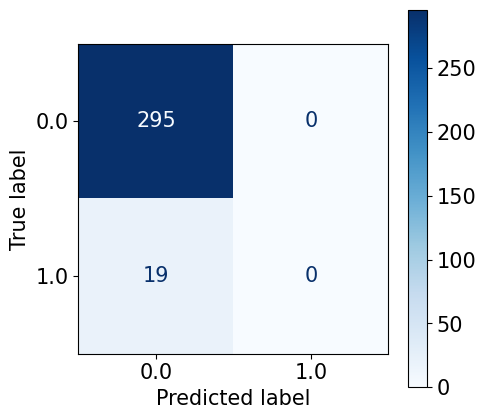

In [449]:
# Test on the test dataset and assess the model
y_pred_rf_test_imb = rf_clf_imb.predict(X_test_boruta) 


#Evaluation using Startified K Fold cross validation
cv = StratifiedKFold(n_splits=10)
scores = cross_val_score(rf_clf_imb, X_train_boruta, y_train, cv=cv, scoring = 'accuracy')
print('Averace Train Accuracy:', scores.mean())

# View accuracy score
print('Test accuracy: ', accuracy_score(y_test, y_pred_rf_test_imb))

####Evaluation####
print('false classification: %d' %(y_test != y_pred_rf_test_imb).sum())

# Calculate F1 score
print('F1 score of test dataset: %f' % f1_score(y_test, y_pred_rf_test_imb))
#Calculate Sensitivity /Recall
print('Recall score of test dataset: %f' % recall_score(y_test, y_pred_rf_test_imb))
#Calculate Precision
print(precision_score(y_test, y_pred_rf_test_imb))


# calculate the confusion matrix
cfm_rf_imb = confusion_matrix(y_test, y_pred_rf_test_imb)
print(cfm_rf_imb)

#Plot confusion matrix
plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(rf_clf_imb, X_test_boruta, y_test, ax=ax, cmap=plt.cm.Blues)

# View the classification report for test data and predictions
print(classification_report(y_test, y_pred_rf_test_imb))

#Caculate the area under the curve
# Random forest with original imbalanced dataset
fpr_rf_imb, tpr_rf_imb, thresholds = roc_curve(y_test, y_pred_rf_test_imb)
auc_rf_imb = round(auc(fpr_rf_imb, tpr_rf_imb),3)
print('AUC for imbalanced dataset =',auc_rf_imb)

In [450]:
def custom_classification_report(y_actual, y_pred):
    tp, fn, fp, tn = confusion_matrix(y_actual, y_pred).ravel()
    acc = (tp+tn)/(tp+tn+fp+fn)
    sen = (tp)/(tp+fn)
    sp = (tn)/(tn+fp)
    ppv = (tp)/(tp+fp)
    npv = (tn)/(tn+fn)
    f1 = 2*(sen*ppv)/(sen+ppv)
    fpr = (fp)/(fp+tn)
    tpr = (tp)/(tp+fn)
    return (    '2X2 confusion matrix:', ['TP', tp, 'FP', fp, 'FN', fn, 'TN', tn],
                'Accuracy:', round(acc, 3),
                'Sensitivity/Recall:', round(sen, 3),
                'Specificity:', round(sp, 3),
                'PPV/Precision:', round(ppv, 3),
                'NPV:', round(npv, 3),
                'F1-score:', round(f1, 3),
                'False positive rate:', round(fpr, 3),
                'True positive rate:', round(tpr, 3),
            )

In [451]:
print(custom_classification_report(y_test, y_pred_rf_test_imb))

('2X2 confusion matrix:', ['TP', 295, 'FP', 19, 'FN', 0, 'TN', 0], 'Accuracy:', 0.939, 'Sensitivity/Recall:', 1.0, 'Specificity:', 0.0, 'PPV/Precision:', 0.939, 'NPV:', nan, 'F1-score:', 0.969, 'False positive rate:', 1.0, 'True positive rate:', 1.0)


<ipython-input-450-bee7f1d99835>:7: RuntimeWarning:

invalid value encountered in long_scalars



###### 8.1.2) Random forest with balanced dataset

In [470]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]

# Criterion
criterion=['gini', 'entropy']

# Number of features to consider at every split
max_features = ['auto', 'sqrt'] #sqrt better

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 200, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2,3,5] # 2 better (1not checked)

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4] # 1  better

# Method of selecting samples for training each tree
bootstrap = [True, False] #False better

#class-weight
class_weight = ["balanced", "balanced_subsample"]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
              'class_weight': class_weight}
print(random_grid)

{'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [1, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, None], 'min_samples_split': [2, 3, 5], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False], 'class_weight': ['balanced', 'balanced_subsample']}


In [473]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(random_state=40)
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
random_rf = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, scoring='recall', n_iter = 100, cv = 5, verbose=2, random_state=40, n_jobs = -1)
# Fit the random search model
random_rf.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=40),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': ['balanced',
                                                         'balanced_subsample'],
                                        'max_depth': [1, 20, 40, 60, 80, 100,
                                                      120, 140, 160, 180, 200,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 3, 5],
                                        'n_estimators': [100, 311, 522, 733,
                                                         944, 1155, 1366, 1577,
                                                         1788, 2000]},
  

In [474]:
#Best hyperparameters
random_rf.best_params_

{'n_estimators': 1577,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 80,
 'class_weight': 'balanced_subsample',
 'bootstrap': True}

In [476]:
# Printing best estimator
random_rf.best_estimator_

RandomForestClassifier(class_weight='balanced_subsample', max_depth=80,
                       n_estimators=1577, random_state=40)

In [625]:
#Grid_Search -  SMOTE
param_rf = {'n_estimators':[100,200,300,400,500], 'max_leaf_nodes':[10,16,18,20],'criterion':['gini','entropy']}
# use random forest classifier
rf_clf = RandomForestClassifier(random_state=40)

# use the GridSearch
grid_rf = GridSearchCV(rf_clf, param_rf, cv = 5, verbose =1, scoring='recall')
grid_rf.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=40),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_leaf_nodes': [10, 16, 18, 20],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='recall', verbose=1)

In [626]:
#Best hyperparameters
grid_rf.best_params_

# Printing best estimator
grid_rf.best_estimator_

RandomForestClassifier(criterion='entropy', max_leaf_nodes=20, n_estimators=300,
                       random_state=40)

In [618]:
# Train Random forest after Smote
#rf_clf_smote = grid_rf.best_estimator_
rf_clf_smote = RandomForestClassifier(max_leaf_nodes= 18, n_estimators= 300, criterion ='gini', random_state=40)
rf_clf_smote.fit(X_train_smote,y_train_smote)

#Train Random forest after SMOTEENN
#rf_clf_smote_enn = random_rf.best_estimator_
#rf_clf_smote_enn.fit(X_train_smoteenn, y_train_smoteenn)


#Train accuracy
print('train accuracy after smote: %f' % rf_clf_smote.score(X_train_smote,y_train_smote))
#print('train accuracy after Smoteenn: %f' % rf_clf_ada.score(X_train_smoteenn, y_train_smoteenn))

train accuracy after smote: 0.931181


false classification: 51
Accuracy:  0.8375796178343949
F1 score of test dataset: 0.215385
Recall score of test dataset: 0.368421
Precision:  0.15217391304347827
[[256  39]
 [ 12   7]]
              precision    recall  f1-score   support

         0.0       0.96      0.87      0.91       295
         1.0       0.15      0.37      0.22        19

    accuracy                           0.84       314
   macro avg       0.55      0.62      0.56       314
weighted avg       0.91      0.84      0.87       314

AUC for SMOTE = 0.618


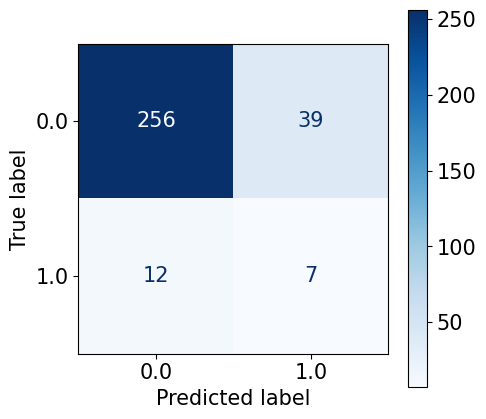

In [619]:
#SMOTE - Predict and assess on the test dataset
y_pred_rf_test_smote = rf_clf_smote.predict(X_test_boruta) 


####Evaluation####
print('false classification: %d' %(y_test != y_pred_rf_test_smote).sum())
# View accuracy score
print('Accuracy: ', accuracy_score(y_test, y_pred_rf_test_smote))

# Calculate F1 score
print('F1 score of test dataset: %f' % f1_score(y_test, y_pred_rf_test_smote))
#Calculate Sensitivity /Recall
print('Recall score of test dataset: %f' % recall_score(y_test, y_pred_rf_test_smote))
#Calculate Precision
print('Precision: ',precision_score(y_test, y_pred_rf_test_smote))


# calculate the confusion matrix
cfm_rf_smote = confusion_matrix(y_test, y_pred_rf_test_smote)
print(cfm_rf_smote)

#Plot confusion matrix
plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(rf_clf_smote, X_test_boruta, y_test, ax=ax, cmap=plt.cm.Blues)

# View the classification report for test data and predictions
print(classification_report(y_test, y_pred_rf_test_smote))

#Caculate the area under the curve
fpr_rf_smote, tpr_rf_smote, thresholds = roc_curve(y_test, y_pred_rf_test_smote)
auc_rf_smote = round(auc(fpr_rf_smote, tpr_rf_smote),3)
print('AUC for SMOTE =',auc_rf_smote)

In [627]:
#ADASYN
# Fit the random search model
#grid_rf.fit(X_train_adasyn, y_train_adasyn)

#Best hyperparameters
#grid_rf.best_params_

# Printing best estimator
#grid_rf.best_estimator_

#Train Random forest after Adasyn
rf_clf_ada = RandomForestClassifier(max_leaf_nodes= 18, n_estimators= 300, criterion ='gini', random_state=40)
rf_clf_ada.fit(X_train_adasyn, y_train_adasyn)

print('train accuracy after adasyn: %f' % rf_clf_ada.score(X_train_adasyn, y_train_adasyn))

train accuracy after adasyn: 0.927119


In [628]:
#Best hyperparameters
grid_rf.best_params_

{'criterion': 'entropy', 'max_leaf_nodes': 20, 'n_estimators': 300}

In [629]:
# Printing best estimator
grid_rf.best_estimator_

RandomForestClassifier(criterion='entropy', max_leaf_nodes=20, n_estimators=300,
                       random_state=40)

false classification: 52
Accuracy:  0.8343949044585988
F1 score of test dataset: 0.187500
Recall score of test dataset: 0.315789
0.13333333333333333
[[256  39]
 [ 13   6]]
              precision    recall  f1-score   support

         0.0       0.95      0.87      0.91       295
         1.0       0.13      0.32      0.19        19

    accuracy                           0.83       314
   macro avg       0.54      0.59      0.55       314
weighted avg       0.90      0.83      0.86       314

AUC for ADASYN = 0.592


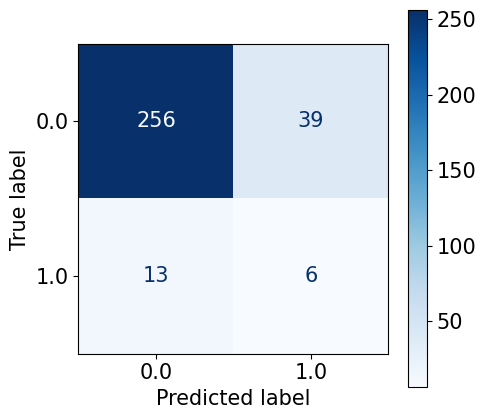

In [630]:
#ADASYN- Test on the test dataset
y_pred_rf_test_ada = rf_clf_ada.predict(X_test_boruta)


####Evaluation####
print('false classification: %d' %(y_test != y_pred_rf_test_ada).sum())
# View accuracy score
print('Accuracy: ', accuracy_score(y_test, y_pred_rf_test_ada))

# Calculate F1 score
print('F1 score of test dataset: %f' % f1_score(y_test, y_pred_rf_test_ada))
#Calculate Sensitivity /Recall
print('Recall score of test dataset: %f' % recall_score(y_test, y_pred_rf_test_ada))
#Calculate Precision
print(precision_score(y_test, y_pred_rf_test_ada))


# calculate the confusion matrix
cfm_rf_ada = confusion_matrix(y_test, y_pred_rf_test_ada)
print(cfm_rf_ada)

#Plot confusion matrix
plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(rf_clf_ada, X_test_boruta, y_test, ax=ax, cmap=plt.cm.Blues)

# View the classification report for test data and predictions
print(classification_report(y_test, y_pred_rf_test_ada))

#Caculate the area under the curve
fpr_rf_ada, tpr_rf_ada, thresholds = roc_curve(y_test, y_pred_rf_test_ada)
auc_rf_ada = round(auc(fpr_rf_ada, tpr_rf_ada),3)
print('AUC for ADASYN =',auc_rf_ada)

In [631]:
#SMOTEENN
# Fit the random search model
grid_rf.fit(X_train_smoteenn, y_train_smoteenn)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=40),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_leaf_nodes': [10, 16, 18, 20],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='recall', verbose=1)

In [632]:
#Best hyperparameters
grid_rf.best_params_

# Printing best estimator
grid_rf.best_estimator_

RandomForestClassifier(criterion='entropy', max_leaf_nodes=20, n_estimators=500,
                       random_state=40)

In [634]:
#Train Random forest after SMOTEENN
rf_clf_smote_enn = grid_rf.best_estimator_
rf_clf_smote_enn.fit(X_train_smoteenn, y_train_smoteenn)

print('train accuracy after adasyn: %f' % rf_clf_smote_enn.score(X_train_smoteenn, y_train_smoteenn))

train accuracy after adasyn: 0.953704


false classification: 67
Accuracy:  0.7866242038216561
F1 score of test dataset: 0.192771
Recall score of test dataset: 0.421053
0.125
[[239  56]
 [ 11   8]]
              precision    recall  f1-score   support

         0.0       0.96      0.81      0.88       295
         1.0       0.12      0.42      0.19        19

    accuracy                           0.79       314
   macro avg       0.54      0.62      0.53       314
weighted avg       0.91      0.79      0.84       314

AUC for SMOTEENN = 0.616


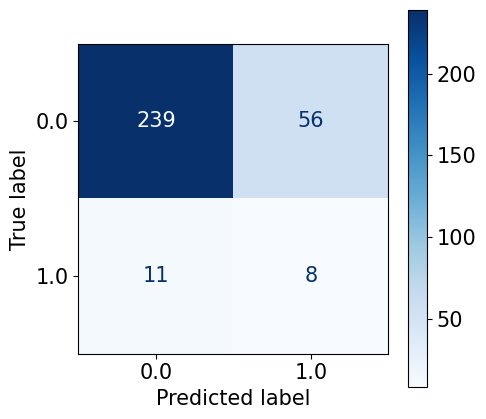

In [635]:
#SMOTE / ENN

#SMOTEENN- Test on the test dataset
y_pred_rf_test_smoteenn = rf_clf_smote_enn.predict(X_test_boruta)


####Evaluation####
print('false classification: %d' %(y_test != y_pred_rf_test_smoteenn).sum())
# View accuracy score
print('Accuracy: ', accuracy_score(y_test, y_pred_rf_test_smoteenn))

# Calculate F1 score
print('F1 score of test dataset: %f' % f1_score(y_test, y_pred_rf_test_smoteenn))
#Calculate Sensitivity /Recall
print('Recall score of test dataset: %f' % recall_score(y_test, y_pred_rf_test_smoteenn))
#Calculate Precision
print(precision_score(y_test, y_pred_rf_test_smoteenn))


# calculate the confusion matrix
cfm_rf_smoteenn = confusion_matrix(y_test, y_pred_rf_test_smoteenn)
print(cfm_rf_smoteenn)

#Plot confusion matrix
plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(rf_clf_smote_enn, X_test_boruta, y_test, ax=ax, cmap=plt.cm.Blues)

# View the classification report for test data and predictions
print(classification_report(y_test, y_pred_rf_test_smoteenn))

#Caculate the area under the curve
fpr_rf_smoteenn, tpr_rf_smoteenn, thresholds = roc_curve(y_test, y_pred_rf_test_smoteenn)
auc_rf_smoteenn = round(auc(fpr_rf_smoteenn, tpr_rf_smoteenn),3)
print('AUC for SMOTEENN =',auc_rf_smoteenn)

###### 8.2) Logistic Regression with Balanced training data (SMOTE) 

In [644]:
# Using Gridsearch to find the best hyperparameter
from sklearn.model_selection import GridSearchCV

param = {
    'C': np.linspace(1, 10, 20, 30)
             }
lr = LogisticRegression()
grid_lr = GridSearchCV(lr, param, cv=10, verbose=5, n_jobs= -1, scoring = 'recall')
grid_lr.fit(X_train_smote, y_train_smote.ravel())

Fitting 10 folds for each of 20 candidates, totalling 200 fits


/opt/anaconda3/envs/SECOM/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([ 1.        ,  1.47368421,  1.94736842,  2.42105263,  2.89473684,
        3.36842105,  3.84210526,  4.31578947,  4.78947368,  5.26315789,
        5.73684211,  6.21052632,  6.68421053,  7.15789474,  7.63157895,
        8.10526316,  8.57894737,  9.05263158,  9.52631579, 10.        ])},
             scoring='recall', verbose=5)

In [645]:
grid_lr.best_params_

{'C': 7.157894736842105}

In [646]:
grid_lr.best_estimator_

LogisticRegression(C=7.157894736842105)

In [491]:
# Train Logistic Regression with SMOTE implementation
lr_smote = grid_lr.best_estimator_
lr_smote.fit(X_train_smote, y_train_smote.ravel())


print('train accuracy: %f' %lr_smote.score(X_train_smote,y_train_smote))

train accuracy: 0.736619


/opt/anaconda3/envs/SECOM/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



false classification: 76
Accuracy:  0.7579617834394905
F1 score of test dataset: 0.155556
Recall score of test dataset: 0.368421
Precision:  0.09859154929577464
[[231  64]
 [ 12   7]]
              precision    recall  f1-score   support

         0.0       0.95      0.78      0.86       295
         1.0       0.10      0.37      0.16        19

    accuracy                           0.76       314
   macro avg       0.52      0.58      0.51       314
weighted avg       0.90      0.76      0.82       314

AUC = 0.576


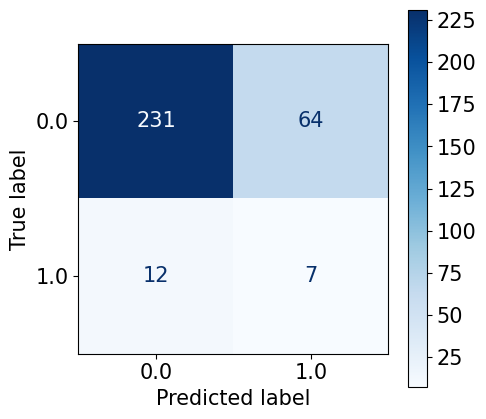

In [495]:
#Predict
y_pred_lr_test_smote = lr_smote.predict(X_test_boruta)  

####Evaluation####
print('false classification: %d' %(y_test != y_pred_lr_test_smote).sum())
# View accuracy score
print('Accuracy: ', accuracy_score(y_test, y_pred_lr_test_smote))

# Calculate F1 score
print('F1 score of test dataset: %f' % f1_score(y_test, y_pred_lr_test_smote))
#Calculate Sensitivity /Recall
print('Recall score of test dataset: %f' % recall_score(y_test, y_pred_lr_test_smote))
#Calculate Precision
print('Precision: ',precision_score(y_test, y_pred_lr_test_smote))


# calculate the confusion matrix
cfm_lr_smote = confusion_matrix(y_test, y_pred_lr_test_smote)
print(cfm_lr_smote)

#Plot confusion matrix
plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(lr_smote, X_test_boruta, y_test, ax=ax, cmap=plt.cm.Blues)

# View the classification report for test data and predictions
print(classification_report(y_test, y_pred_lr_test_smote))

#Caculate the area under the curve
fpr_lr_smote, tpr_lr_smote, thresholds = roc_curve(y_test, y_pred_lr_test_smote)
auc_lr_smote = round(auc(fpr_lr_smote, tpr_lr_smote),3)
print('AUC =',auc_lr_smote)

SMOTEENN

In [647]:
# Using Gridsearch to find the best hyperparameter
from sklearn.model_selection import GridSearchCV

param = {
    'C': np.linspace(1, 10, 20, 30)
             }
lr = LogisticRegression()
grid_lr = GridSearchCV(lr, param, cv=10, verbose=5, n_jobs= -1, scoring = 'recall')
grid_lr.fit(X_train_smoteenn, y_train_smoteenn.ravel())

Fitting 10 folds for each of 20 candidates, totalling 200 fits


/opt/anaconda3/envs/SECOM/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([ 1.        ,  1.47368421,  1.94736842,  2.42105263,  2.89473684,
        3.36842105,  3.84210526,  4.31578947,  4.78947368,  5.26315789,
        5.73684211,  6.21052632,  6.68421053,  7.15789474,  7.63157895,
        8.10526316,  8.57894737,  9.05263158,  9.52631579, 10.        ])},
             scoring='recall', verbose=5)

In [648]:
grid_lr.best_params_

{'C': 1.9473684210526314}

In [649]:
grid_lr.best_estimator_

LogisticRegression(C=1.9473684210526314)

In [650]:
# Logistic Regression with SMOTEENN implementation
lr_smote_enn = LogisticRegression(C=1.9473684210526314,penalty='l2', verbose=0)
lr_smote_enn.fit(X_train_smoteenn, y_train_smoteenn.ravel())

print('train accuracy after adasyn: %f' %lr_smote_enn.score(X_train_smoteenn,y_train_smoteenn))

train accuracy after adasyn: 0.794753


/opt/anaconda3/envs/SECOM/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



false classification: 106
Accuracy:  0.6624203821656051
F1 score of test dataset: 0.116667
Recall score of test dataset: 0.368421
Precision:  0.06930693069306931
[[201  94]
 [ 12   7]]
              precision    recall  f1-score   support

         0.0       0.94      0.68      0.79       295
         1.0       0.07      0.37      0.12        19

    accuracy                           0.66       314
   macro avg       0.51      0.52      0.45       314
weighted avg       0.89      0.66      0.75       314

AUC = 0.525


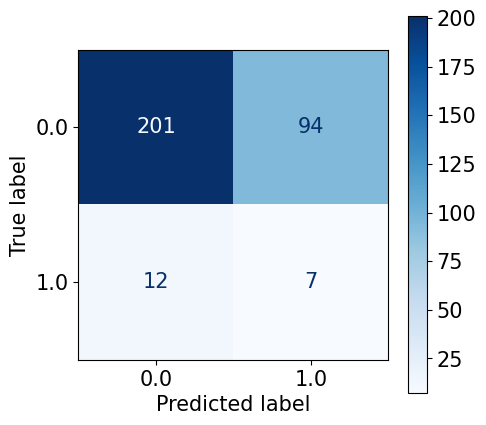

In [651]:
#Predict
y_pred_lr_test_smoteenn = lr_smote_enn.predict(X_test_boruta)  

####Evaluation####
print('false classification: %d' %(y_test != y_pred_lr_test_smoteenn).sum())
# View accuracy score
print('Accuracy: ', accuracy_score(y_test, y_pred_lr_test_smoteenn))

# Calculate F1 score
print('F1 score of test dataset: %f' % f1_score(y_test, y_pred_lr_test_smoteenn))
#Calculate Sensitivity /Recall
print('Recall score of test dataset: %f' % recall_score(y_test, y_pred_lr_test_smoteenn))
#Calculate Precision
print('Precision: ',precision_score(y_test, y_pred_lr_test_smoteenn))


# calculate the confusion matrix
cfm_lr_smoteenn = confusion_matrix(y_test, y_pred_lr_test_smoteenn)
print(cfm_lr_smoteenn)

#Plot confusion matrix
plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(lr_smote_enn, X_test_boruta, y_test, ax=ax, cmap=plt.cm.Blues)

# View the classification report for test data and predictions
print(classification_report(y_test, y_pred_lr_test_smoteenn))

#Caculate the area under the curve
fpr_lr_smoteenn, tpr_lr_smoteenn, thresholds = roc_curve(y_test, y_pred_lr_test_smoteenn)
auc_lr_smoteenn = round(auc(fpr_lr_smoteenn, tpr_lr_smoteenn),3)
print('AUC =',auc_lr_smoteenn)

###### 8.3) Support Vector machine (SVM) after SMOTE

In [671]:
# Using Gridsearch to find the best hyperparameter
from sklearn.model_selection import GridSearchCV

param = {
    'C': [0.01,0.1,1,10],
    'kernel':['linear', 'poly', 'rbf'],
    'gamma' :['scale','auto'] 
        }                 

svm = SVC()
grid_svm = GridSearchCV(svm, param, cv=5, verbose=5, n_jobs= -1, scoring = 'recall')
grid_svm.fit(X_train_smote,y_train_smote.ravel())

Fitting 5 folds for each of 24 candidates, totalling 120 fits


KeyboardInterrupt: 

In [ ]:
grid_svm.best_params_

In [ ]:
grid_svm.best_estimator_

In [672]:
# Train Logistic Regression with SMOTE implementation
svm_clf = SVC(gamma='scale')
svm_clf.fit(X_train_smote, y_train_smote)

print('train accuracy: %f' %svm_clf.score(X_train_smote,y_train_smote))

train accuracy: 0.736619


false classification: 56
Accuracy:  0.821656050955414
F1 score of test dataset: 0.200000
Recall score of test dataset: 0.368421
Precision:  0.13725490196078433
[[251  44]
 [ 12   7]]
              precision    recall  f1-score   support

         0.0       0.95      0.85      0.90       295
         1.0       0.14      0.37      0.20        19

    accuracy                           0.82       314
   macro avg       0.55      0.61      0.55       314
weighted avg       0.90      0.82      0.86       314

AUC = 0.61


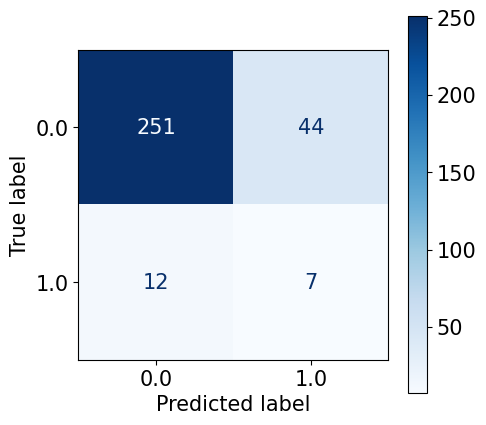

In [677]:
#Predict
y_pred_svm_test = svm_clf.predict(X_test_boruta)  

####Evaluation####
print('false classification: %d' %(y_test != y_pred_svm_test).sum())
# View accuracy score
print('Accuracy: ', accuracy_score(y_test, y_pred_svm_test))

# Calculate F1 score
print('F1 score of test dataset: %f' % f1_score(y_test, y_pred_svm_test))
#Calculate Sensitivity /Recall
print('Recall score of test dataset: %f' % recall_score(y_test, y_pred_svm_test))
#Calculate Precision
print('Precision: ',precision_score(y_test, y_pred_svm_test))


# calculate the confusion matrix
cfm_svm = confusion_matrix(y_test, y_pred_svm_test)
print(cfm_svm)

#Plot confusion matrix
plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(svm_clf, X_test_boruta, y_test, ax=ax, cmap=plt.cm.Blues)

# View the classification report for test data and predictions
print(classification_report(y_test, y_pred_svm_test))

#Caculate the area under the curve
fpr_svm, tpr_svm, thresholds = roc_curve(y_test, y_pred_svm_test)
auc_svm = round(auc(fpr_svm, tpr_svm),3)
print('AUC =',auc_svm)

###### 8.4) Naive Bayes / SMOTE

In [678]:
gnb = GaussianNB()
gnb.fit(X_train_smote, y_train_smote)

print('train accuracy: %f' % gnb.score(X_train_smote, y_train_smote))

train accuracy: 0.748938


false classification: 69
Test accuracy:  0.7802547770700637
F1 score of test dataset: 0.168675
Recall score of test dataset: 0.368421
Precision:  0.109375
[[238  57]
 [ 12   7]]
              precision    recall  f1-score   support

         0.0       0.95      0.81      0.87       295
         1.0       0.11      0.37      0.17        19

    accuracy                           0.78       314
   macro avg       0.53      0.59      0.52       314
weighted avg       0.90      0.78      0.83       314

AUC = 0.588


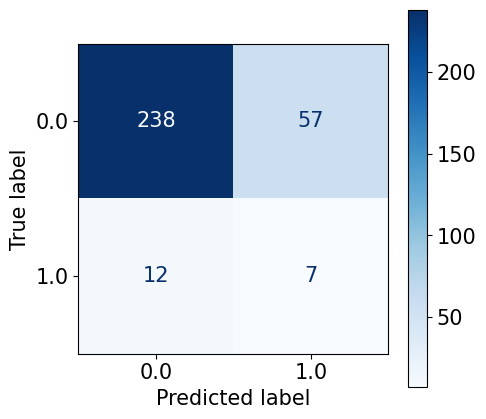

In [679]:
#Predict
y_pred_gnb_test = gnb.predict(X_test_boruta)  

####Evaluation####
print('false classification: %d' %(y_test != y_pred_gnb_test).sum())
# View accuracy score
print('Test accuracy: ', accuracy_score(y_test, y_pred_gnb_test))

# Calculate F1 score
print('F1 score of test dataset: %f' % f1_score(y_test, y_pred_gnb_test))
#Calculate Sensitivity /Recall
print('Recall score of test dataset: %f' % recall_score(y_test, y_pred_gnb_test))
#Calculate Precision
print('Precision: ',precision_score(y_test, y_pred_gnb_test))


# calculate the confusion matrix
cfm_gnb = confusion_matrix(y_test, y_pred_gnb_test)
print(cfm_gnb)

#Plot confusion matrix
plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(gnb, X_test_boruta, y_test, ax=ax, cmap=plt.cm.Blues)

# View the classification report for test data and predictions
print(classification_report(y_test, y_pred_gnb_test))

#Caculate the area under the curve
fpr_gnb, tpr_gnb, thresholds = roc_curve(y_test, y_pred_gnb_test)
auc_gnb = round(auc(fpr_gnb, tpr_gnb),3)
print('AUC =',auc_gnb)

###### 8.5) AdaBoost

In [682]:
#use the GridSearch to automatically find the best parameters. 
param_grid_ada_clf = {'n_estimators':[10,25,40],'learning_rate' :[0.1,0.5]}

# use random forest classifier
ada_clf = AdaBoostClassifier()

grid_search_ada_clf = GridSearchCV(ada_clf, param_grid_ada_clf, cv = 10)
grid_search_ada_clf.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=10, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.1, 0.5],
                         'n_estimators': [10, 25, 40]})

In [683]:
grid_search_ada_clf.best_params_

{'learning_rate': 0.5, 'n_estimators': 40}

In [684]:
grid_search_ada_clf.best_estimator_

AdaBoostClassifier(learning_rate=0.5, n_estimators=40)

In [685]:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators =40,  
                             algorithm = 'SAMME.R', learning_rate=0.5)
ada_clf.fit(X_train_smote, y_train_smote)
print('train accuracy: %f' % ada_clf.score(X_train_smote, y_train_smote))

train accuracy: 0.885302


false classification: 63
Test accuracy:  0.7993630573248408
F1 score of test dataset: 0.160000
Recall score of test dataset: 0.315789
Precision:  0.10714285714285714
[[245  50]
 [ 13   6]]
              precision    recall  f1-score   support

         0.0       0.95      0.83      0.89       295
         1.0       0.11      0.32      0.16        19

    accuracy                           0.80       314
   macro avg       0.53      0.57      0.52       314
weighted avg       0.90      0.80      0.84       314

AUC = 0.573


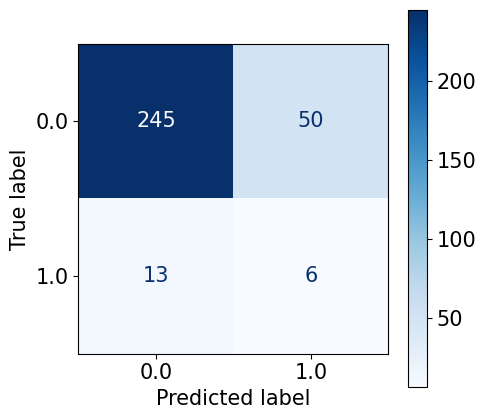

In [688]:
#Predict
y_pred_ada_test = ada_clf.predict(X_test_boruta)  

####Evaluation####
print('false classification: %d' %(y_test != y_pred_ada_test).sum())
# View accuracy score
print('Test accuracy: ', accuracy_score(y_test, y_pred_ada_test))

# Calculate F1 score
print('F1 score of test dataset: %f' % f1_score(y_test, y_pred_ada_test))
#Calculate Sensitivity /Recall
print('Recall score of test dataset: %f' % recall_score(y_test, y_pred_ada_test))
#Calculate Precision
print('Precision: ',precision_score(y_test, y_pred_ada_test))


# calculate the confusion matrix
cfm_ada = confusion_matrix(y_test, y_pred_ada_test)
print(cfm_ada)

#Plot confusion matrix
plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(ada_clf, X_test_boruta, y_test, ax=ax, cmap=plt.cm.Blues)

# View the classification report for test data and predictions
print(classification_report(y_test, y_pred_ada_test))

#Caculate the area under the curve
fpr_ada, tpr_ada, thresholds = roc_curve(y_test, y_pred_ada_test)
auc_ada = round(auc(fpr_ada, tpr_ada),3)
print('AUC =',auc_ada)

### 9. Comparison / Evaluate the model with  AUC, Accuracy, Recall

###### 9.1 Comparison of Roc curve and AUC

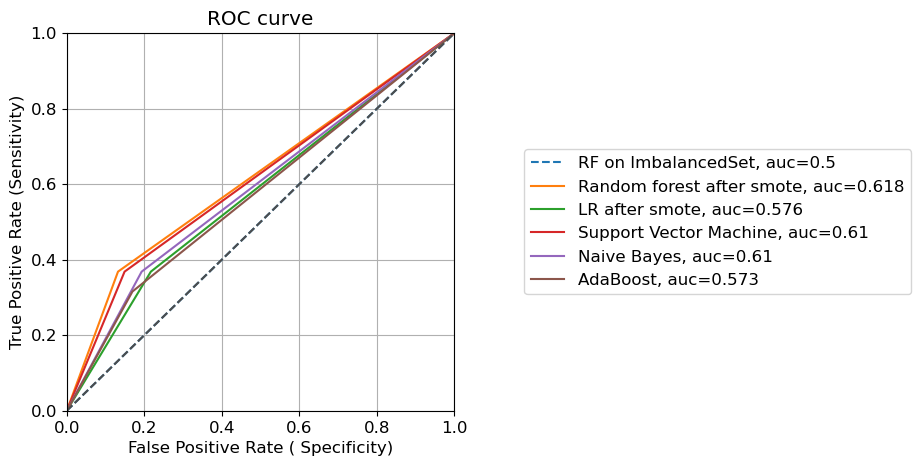

In [696]:
# Plot Roc_curve for each model and caculate the area under the curve using auc.

# Ranom Forest with original imbalanced dataset
fpr_rf_imb, tpr_rf_imb, thresholds = roc_curve(y_test, y_pred_rf_test_imb)
auc_rf_imb = round(auc(fpr_rf_imb, tpr_rf_imb),3)

#ALL SMOTE

# Random forest with
fpr_rf_smote, tpr_rf_smote, thresholds = roc_curve(y_test, y_pred_rf_test_smote)
auc_rf_smote = round(auc(fpr_rf_smote, tpr_rf_smote),3)

# Logistic regression
fpr_lr_smote, tpr_lr_smote, thresholds = roc_curve(y_test, y_pred_lr_test_smote)
auc_lr_smote = round(auc(fpr_lr_smote, tpr_lr_smote),3)

#SVM
fpr_svm, tpr_svm, thresholds = roc_curve(y_test, y_pred_svm_test)
auc_svm = round(auc(fpr_svm, tpr_svm),3)

#Naive Bayes
fpr_gnb, tpr_gnb, thresholds = roc_curve(y_test, y_pred_gnb_test)
auc_gnb = round(auc(fpr_gnb, tpr_gnb),3)

#AdaBoost
fpr_ada, tpr_ada, thresholds = roc_curve(y_test, y_pred_ada_test)
auc_ada = round(auc(fpr_ada, tpr_ada),3)


# Plot the graph
fig, ax = plt.subplots()
ax.plot(fpr_rf_imb, tpr_rf_imb, label= "RF on ImbalancedSet, auc="+str(auc_rf_imb),linestyle= "--" )
ax.plot(fpr_rf_smote, tpr_rf_smote, label= "Random forest after smote, auc="+str(auc_rf_smote))
ax.plot(fpr_lr_smote, tpr_lr_smote, label= "LR after smote, auc="+str(auc_lr_smote))
ax.plot(fpr_svm, tpr_svm, label= "Support Vector Machine, auc="+str(auc_svm))
ax.plot(fpr_gnb, tpr_gnb, label= "Naive Bayes, auc="+str(auc_svm))
ax.plot(fpr_ada, tpr_ada, label= "AdaBoost, auc="+str(auc_ada))
plt.legend(loc='center right',bbox_to_anchor=(2.2, 0.5))
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate ( Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

Area Under the Curve, or AUC showing the performance of a model. The performance can be classed as follows,

- 0.90 - 1.00 = excellent
- 0.80 - 0.90 = good
- 0.70 - 0.80 = fair
- 0.60 - 0.70 = poor
- 0.50 - 0.60 = fail



##### 9.2 Comparison with accuracy and sensitivity

In [703]:
#compare the accurracy score for each classifier model
clf_total = [rf_clf_smote,lr_smote, svm_clf, gnb, ada_clf]

# Create a dataframe for storing the models scores from the for loop.
scores_df = pd.DataFrame(columns= ['models','accuracy','sensitivity','f1_score'])

for clf, i in zip(clf_total,range(5)):
    clf.fit(X_train_smote, y_train_smote)
    y_pred = clf.predict(X_test_boruta)
    
    scores_df.loc[i,['models']] = clf.__class__.__name__
    scores_df.loc[i,['accuracy']] = accuracy_score(y_test, y_pred)
    scores_df.loc[i,['sensitivity']] = recall_score(y_test, y_pred)
    scores_df.loc[i,['f1_score']] = f1_score(y_test, y_pred)

/opt/anaconda3/envs/SECOM/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [704]:
# summary of the results of different models
scores_df

,models,accuracy,sensitivity,f1_score
0,RandomForestClassifier,0.83758,0.368421,0.215385
1,LogisticRegression,0.757962,0.368421,0.155556
2,SVC,0.821656,0.368421,0.2
3,GaussianNB,0.780255,0.368421,0.168675
4,AdaBoostClassifier,0.799363,0.315789,0.16


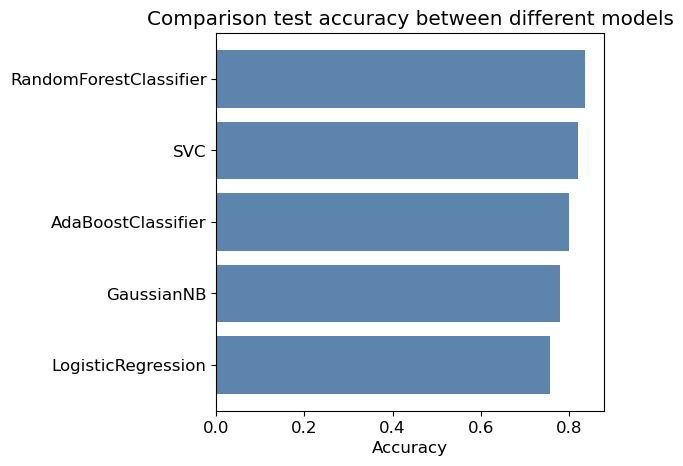

In [708]:
# draw the accuracy with horizontal bars
fig, ax = plt.subplots()

# Sort the scores_df in descending order by accuracy
scores_acc = scores_df.sort_values(by = 'accuracy', ascending = False)

model_list = scores_acc.loc[:,'models']
y_pos = np.arange(len(model_list))

ax.barh(y_pos,scores_acc.loc[:,'accuracy'] ,align = 'center', color=(0.2, 0.4, 0.6, 0.8))
ax.set_yticks(y_pos)
ax.set_yticklabels(model_list)
ax.invert_yaxis()
ax.set_xlabel('Accuracy')
ax.set_title('Comparison test accuracy between different models')

plt.show()

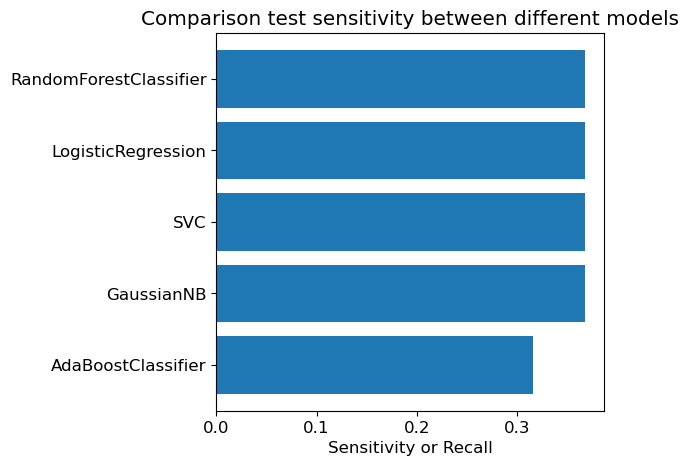

In [706]:
# draw the sensitivity with horizontal bars
fig, ax = plt.subplots()

# Sort the scores_df in descending order by sensitivity
scores_sen = scores_df.sort_values(by = 'sensitivity', ascending = False)

model_list2 = scores_sen.loc[:,'models']
y_pos = np.arange(len(model_list2))


ax.barh(y_pos, scores_sen.loc[:,'sensitivity'] ,align = 'center')
ax.set_yticks(y_pos)
ax.set_yticklabels(model_list2)
ax.invert_yaxis() 
ax.set_xlabel('Sensitivity or Recall')
ax.set_title('Comparison test sensitivity between different models')

plt.show()